# **Capstone Project: California Housing Price**

# Business Problem Understanding
---

### **Context**


California is a state situated in the western part of the United States, bordered by Oregon to the north, Nevada and Arizona to the east, and the state of Baja California in Mexico to the south. Its coastline facing the Pacific Ocean adds a distinctive charm. With a population exceeding 39.2 million people, California tops the list as the most populous state in the US.

Given its status as the most populous state in the US, California boasts an extraordinary demographic diversity. With a population size surpassing many other US states, the population density, ethnic variety, cultural richness, and economic factors in California create its unique societal characteristics. This diversity reflects significant variations in the needs and preferences of its residents, including in the housing sector.

*source: [Wikipedia](https://id.wikipedia.org/wiki/California)*

### **Problem Statement**

In the context of housing, the variation in California's home prices is influenced by numerous demographic factors. For instance, areas with higher average incomes or those near business centers tend to have higher home prices than less strategically located areas. Similarly, homes that offer beautiful beach views typically come with a steeper price tag. **These factors underscore the unique challenges in setting property prices in California, given that population density and demographic variations significantly impact housing price trends in the region.**

Given the context, **realtors** or **brokers** stand at the forefront, bridging the gap between buyers and sellers. Their role demands not only an understanding of market dynamics but also **the ability to accurately price properties to meet both seller expectations and buyer budgets**. The insights drawn from the California Census data are invaluable in providing insights into home characteristics and population profiles, aiding in assessing and forecasting home prices. 

### **Goals**

To address these challenges, realtors need a tool that **can determine the average price of a home in California based on its features (total rooms, total bedrooms) as well as other macro factors (population, average income, location) that can influence its value.** The nuances in property features and macro conditions can enhance the accuracy of house price predictions. This precision not only benefits realtors by optimizing their pricing strategies but also ensures a fair price for prospective buyers.

**The proposed solution is to build a machine learning model** designed to predict the average house prices in California, leveraging the features present in the California Census data.

Building a machine learning model to predict house prices in California equips realtors with a competitive edge. It **helps set the right price for homes** and **builds trust with client** through data-backed estimations in decison-making. Realtors can **maximize profits while ensuring homes don't remain on the market for extended periods due to overpricing.** The tool helps realtors see where to focus their efforts, understand market changes, avoid pricing mistakes, and market homes better by highlighting the best features. Overall, this tool makes the selling process smoother and can lead to more sales in the California housing market.

### **Analytic Approach**

Initially, our focus will be on diving deep into the data, aiming to extract valuable insights that highlight the unique attributes of each home. 

Next, we'll construct a regression model. This model is intended to serve as a resourceful tool for realtors, enabling them to forecast the average house prices, especially when presented with fresh features from the California Census data.

### **Evaluation Metrics** 

To assess the precision of a regression model, several evaluation metrics are commonly used. In this modeling technique, we will use 3 evaluation metrics which are **Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE)**.

1. **Root Mean Squared Error (RMSE)**
    - It represents the standard deviation of the residuals (the differences between observed and predicted values). RMSE quantifies how far off our predictions are, on average, from the actual values.
    - **The lower the RMSE, the better the model**
2. **Mean Absolute Error (MAE)**
    - Measures the average of the absolute errors between the predicted and actual values
    - **The lower the MAE, the better the model**
3. **Mean Absolute Percentage Error (MAPE)**
    - Measures the average percentage error between the predicted and actual values. It's particularly useful when we want to understand the prediction error in percentage terms
    - **The lower the MAPE, the better the model**

# Data Understanding
---

The dataset we'll be using is based on the 1990 census in California. This census provides details about homes in districts throughout California, along with various summary statistics that can help in predicting house prices.

Even though this dataset isn't the latest and doesn't align with current trends, it's still a robust representation of the features necessary for constructing a machine learning model to forecast house prices in California.

*source: [Dataset California House Pricing](https://drive.google.com/drive/u/1/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo)*

In [354]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sketch as sketch

import warnings
warnings.filterwarnings('ignore')

In [451]:
# Load Data
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


For the sake of illustration, this index row [0] describes a specific housing block in California:

- The location of this block is given by its **longitude** and **latitude** coordinates, which are \(-119.79\) and \(36.73\) respectively. This means it's situated relatively west and north on the map.
- The houses in this block have a **median age** of \(52\) years, indicating that most houses in this block were built around 52 years ago from the time of the census.
- The block consists of **112 total rooms** and **28 total bedrooms** across all the houses.
- There are **193 people** living in this block, spread across **40 households**.
- The **median income** of households in this block is \(1.9750 \* 10.000\) or approximately $19.750.
- The houses in this block have an **ocean proximity** labeled as **"INLAND"**, which means they are located further away from the ocean.
- The **median house value** in this block, which represents the middle price when all house prices are arranged in ascending order, is $47,500. 

So, this row gives us a snapshot of the housing and demographic characteristics of a specific block in California as per the 1990 census data.

### **Columns Description**

| Columns             | Description                                                                    |
|---------------------|------------------------------------------------------------------------------------------|
| longitude           | How west a house is, with higher values being more to the west                           |
| latitude            | How north a house is, with higher values being more to the north                         |
| housing_median_age  | The median age of houses in a block; smaller numbers mean newer houses                   |
| total_rooms         | Total rooms within a block                                                                   |
| total_bedrooms      | Total bedrooms within a block                                                                |
| population          | How many people within in a block                                                          |
| households          | Number of groups of people living in homes in a block                                    |
| median_income       | Median income for households within a block of houses (in tens of thousands of dollars)                     |
| ocean_proximity     | How close the house is to the ocean                                                      |
| median_house_value  | Median house price for households within a block (in dollars)                                              |

*source: [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)*

### **Exploratory Data Analysis**

#### **Distribution of median_house_value**

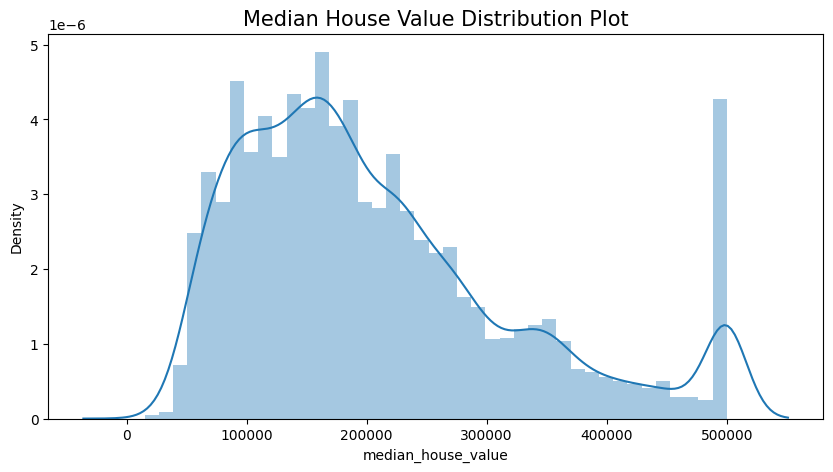

In [356]:
# Create histogram median_house_value 
plt.figure(figsize=(10, 5))
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot', size=15)
plt.show()

Based on the histogram above, we can see that the "median_house_value" is positively skewed or right skewed thus it is not normally distributed

#### **Correlations**

We will try to see the correlations between numerical features with target variables using heatmap. Not only that we will also try to calculate the Spearman Correlation since our data is normally distributed

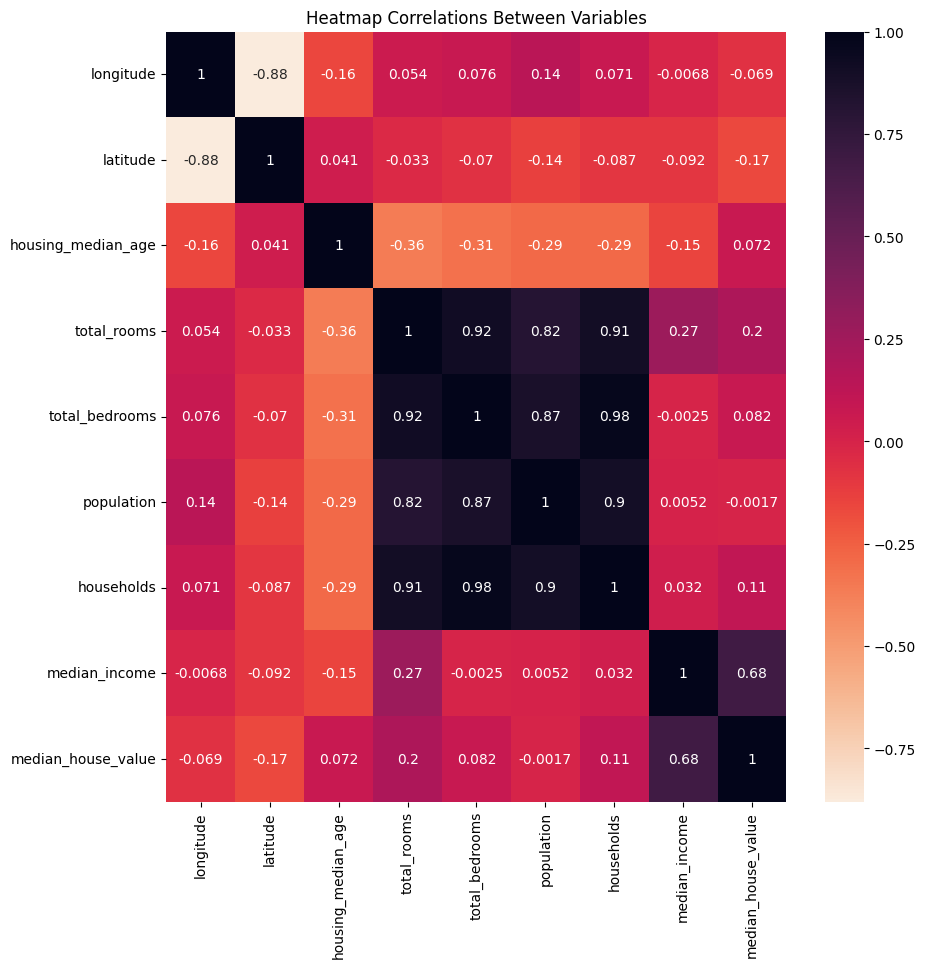

In [357]:
# Create Heatmap Correlations 
numerical_columns = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']]

plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(method='spearman'),annot=True,cmap="rocket_r")
plt.title(f"Heatmap Correlations Between Variables")
plt.show()

In [358]:
# Calculate correlation of all features with target variable 
pd.DataFrame((df.corrwith(df['median_house_value'], method='spearman').sort_values(ascending=False)),columns=['Spearman Correlation'])

,Spearman Correlation
median_house_value,1.000000
median_income,0.680296
total_rooms,0.199245
households,0.108217
total_bedrooms,0.081704
housing_median_age,0.072069
population,-0.001653
longitude,-0.069389
ocean_proximity,-0.129480
latitude,-0.167250


Spearman correlation ranges from -1 to 1 where correlation near 1 indicates a strong positive relationship meaning one variable increases, the other also increases. If the correlation near -1, it indicates a strong negative relationship meaning one variable increases, the other decreases. Lastly, correlation near 0 means weak relationship between two variables. 

From these we can see that "median_income" (0.680296), "total_rooms" (0.199245), and "households" (0.108217) has a strong positive correlation with "median_house_value". It indicates that as median income increases, median house value tends to increase as well. Not only that, areas with more rooms or households tend to have higher median house value. Meanwhile, "longitude" (-0.069389), "ocean_proximity" (-0.129480), "latitude" (-0.167250) have negative correlations with "median_house_value". This means that houses closer to the ocean tend to have lower values. The rest of the features, particularly "population", have less strong relationship.  

#### **Houses Based on Ocean Proximity**

The first thing to do is to identify the categories of ocean_proximity based on visualization using Latitude and Longitude. Initially, there aree 5 categories in ocean_prroximity which are Inland, Near bay, Near Ocean, Island, <1H Ocean. 

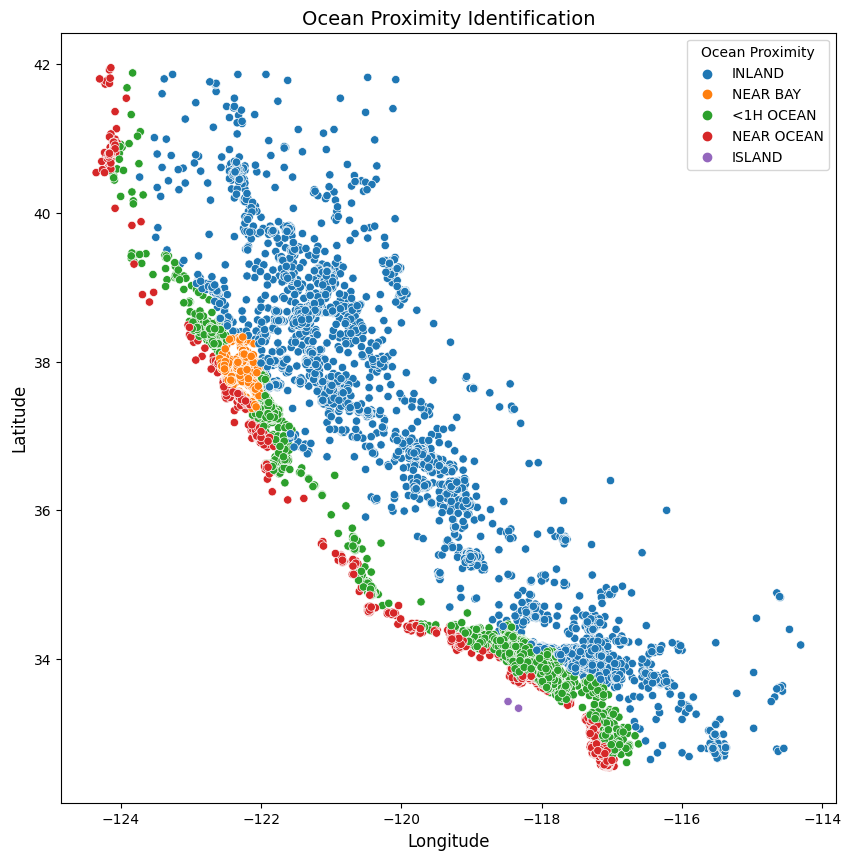

In [359]:
# Create Plot 

plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='latitude',x='longitude',hue='ocean_proximity')
plt.title(f"Ocean Proximity Identification",size=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Ocean Proximity")
plt.show()

Based on the visualization above, we can assume that: 

1. **<1H Ocean**
    - This likely means that the property is **less than one hour away from the ocean**, suggesting a close proximity but not necessarily direct access to the ocean.
2. **Inland**
    - This indicates that the property is situated **away from the coast**. Such properties are typically farther from the ocean and might not have direct, easy access to the beach.
3. **Near Ocean** 
    - This suggests that the property is **in close proximity to the ocean**, perhaps closer than those labeled "<1H Ocean", but it might not be directly on the coastline.
4. **Near Bay** 
    - This indicates that the property is **near a bay**, which is a body of water partially enclosed by land but with a wide mouth, affording access to the sea. Bays are typically calmer than the open ocean.
5. **Island** 
    - This suggests that the property is **situated on an island**, which is a piece of land completely surrounded by water.

#### **Population Density in California** 

We will try to see population density in California 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


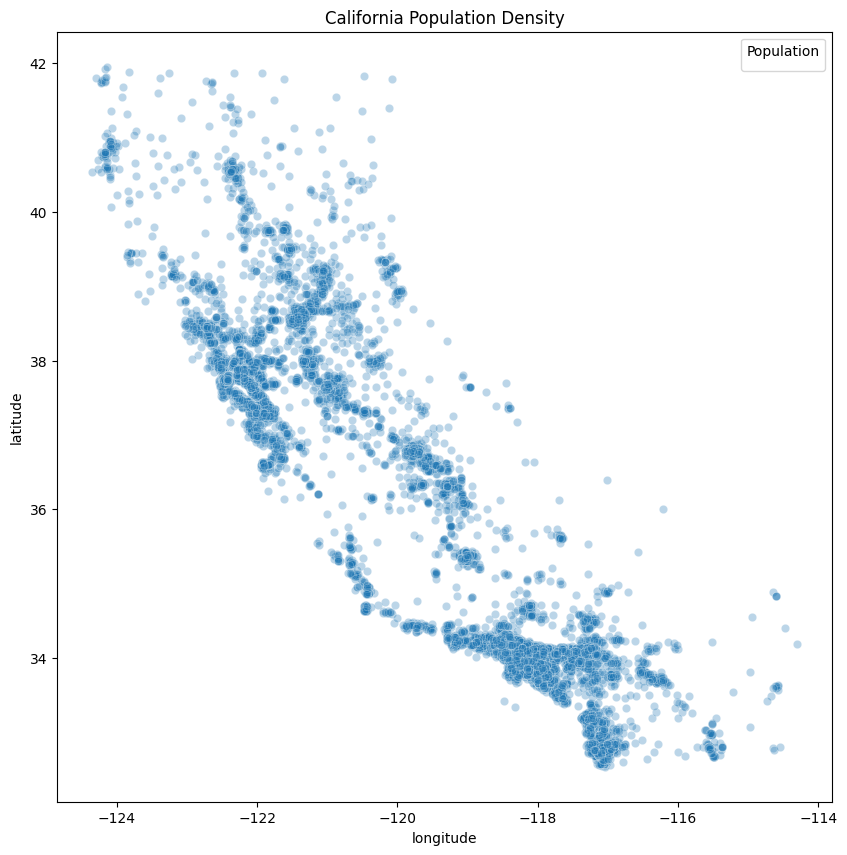

In [360]:
# Createe scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='latitude',x='longitude',alpha=0.3)
plt.legend(title='Population')
plt.title(f"California Population Density")
plt.show()

Based on the plot above, we can see that there are certain areas or cities where the population is pretty dense. Based on the latitude and longitude, the lower the area is, the closer it get to the ocean so we can assume that most people in California tend to live near the Ocean. In order to see which cities with dense population, we will use folium to locate those cities. 

In [361]:
import folium
from folium.plugins import FastMarkerCluster

# Create a Folium map centered at a specific location
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

locations = list(zip(df['latitude'], df['longitude'], df['population']))

# Create a FastMarkerCluster layer with population data
FastMarkerCluster(locations, name='Population Density').add_to(california_map)

california_map


From the folium above, we can see that most areas with dense population are big cities in California sucah as Los Angeles and San Francisco. Based on the map, San Francisco and Los Angeles are located near the coastline, thus proven our assumption before. This is totally acceptable since big cities typically offer a wide range of job opportunities and prestigious universities.

#### **House Value in California**

We already know that the majority of people in California live near the coastline. Now, we want to examine the distribution of house values in different areas of California

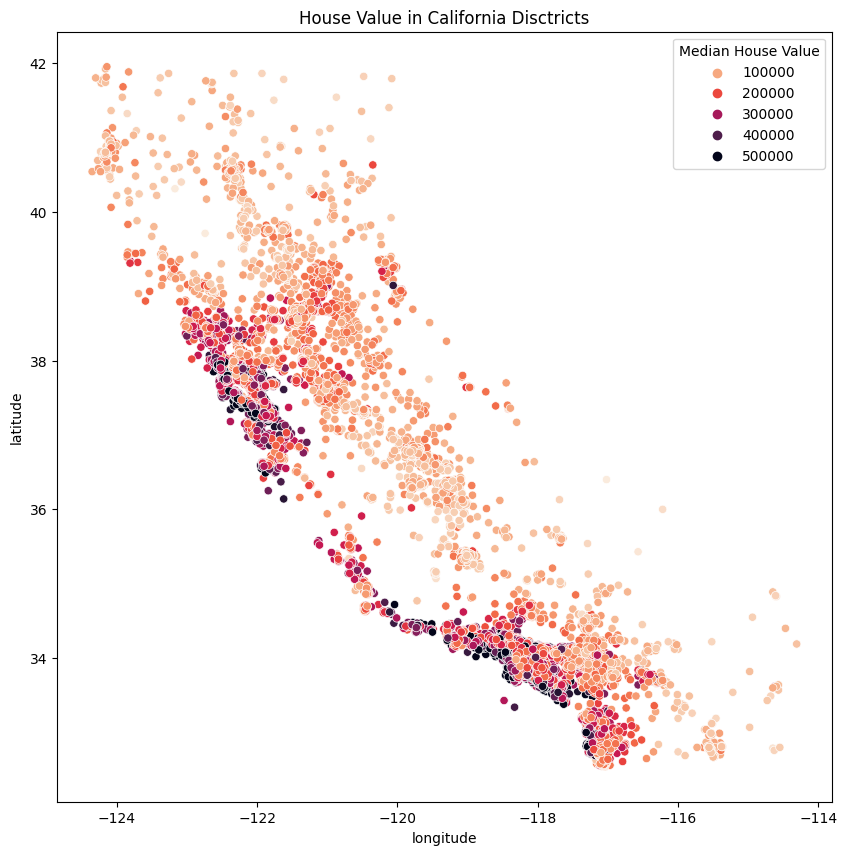

In [362]:
# Create scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='latitude',x='longitude',hue='median_house_value',palette="rocket_r")
plt.legend(title='Median House Value')
plt.title(f"House Value in California Disctricts")
plt.show()

Based on the location, houses near the ocean often command higher prices. This is due to the desirability of coastal locations, which offer scenic views, easy access to beaches, and a generally pleasant environment, making them more attractive to buyers.

#### **House Value by Ocean Proximity** 

After ploting the distribution of house value in California, we conclude that houses near the ocean tend to have higher value. Now let's see the house values based on ocean proximity 

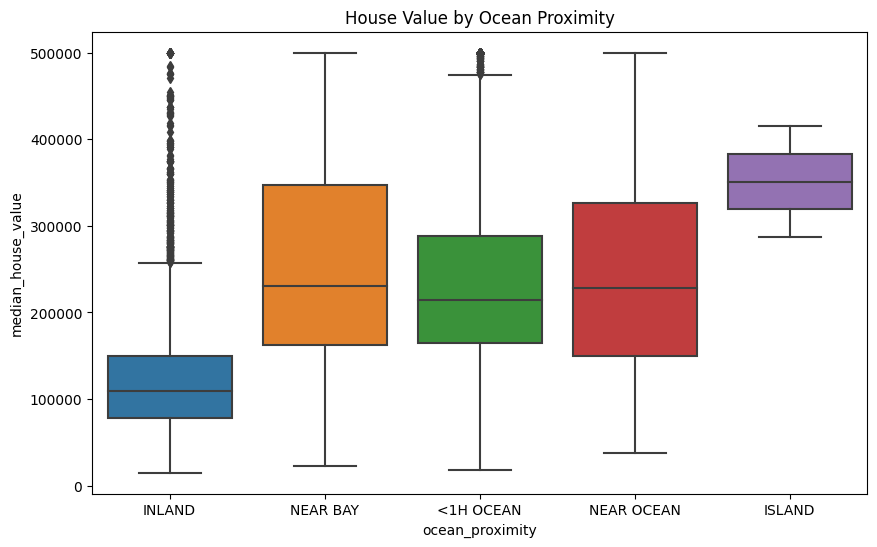

In [363]:
# Create Boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('House Value by Ocean Proximity')
plt.show()


Based on the boxplot above, the house values located near bay and ear ocean have high range of value which is from USD200.000 until about USD300.000, though there are also a lot of houses on the inland that are expensive with price up to USD500.000. Not to mention, houses located on the island are the most expensive houses in California.    

It turns out that ocean_proximity doesn't have a significant impact on house prices in California. We can see that even in the Inland areas, prices vary (there are still expensive houses). However, overall, we can conclude that houses near the coast (near bay, <1H ocean, and near ocean) have a higher range of house prices.

#### **Home Location Preferences Based on Ocean Proximity** 

Next, let's take a look at the locations that are most preferred by people for having a house in California.

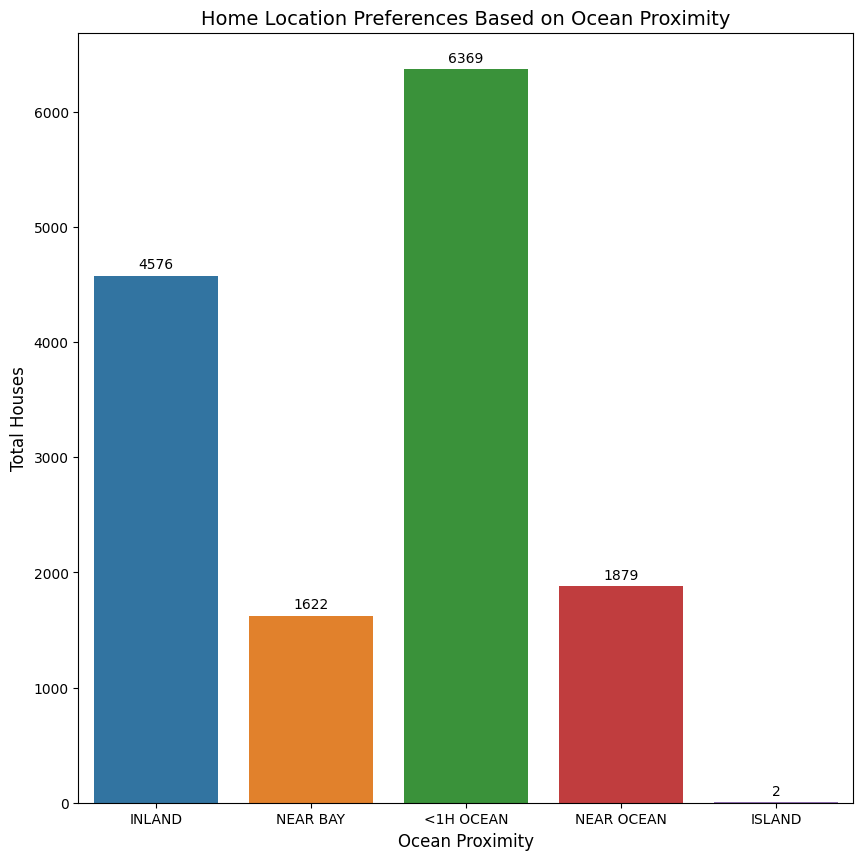

In [364]:
# Create bar graph 
plt.figure(figsize=(10,10))
plt.title(f"Home Location Preferences Based on Ocean Proximity",size=14)
count_house = sns.countplot(data=df,x=df['ocean_proximity'])
plt.ylabel("Total Houses", size=12)
plt.xlabel("Ocean Proximity",size=12)

for bar in count_house.patches:
    count_house.annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center',
                         size=10, xytext=(0, 8),
                         textcoords='offset points')

plt.show()

The majority of people in California prefer to live in a house located less than 1 hour from the ocean, meaning that their house is still close to the ocean but does not necessarily have direct access to the ocean. Based on the house values, we can also see that the price range is less expensive than the one near the bay or near the ocean. Therefore, it is the most desirable place to live in the market.

# Data Cleaning
---

At this stage, we will check for anomalies and clean the data to use the cleaned data to build our model. A few things need to be done in this step:
1. Check for data types
2. Check if there are any unnecessary columns that need to be dropped
3. Check for missing values
4. Check for outliers
5. Check for duplicate values


## **Data Information**

Before cleaning, we will create a dataframe containing information such as data type, number of missing values, and number of unique values in the dataset.

For building our model, we will use a copy of our raw dataset

In [365]:
# Create copy of dataframe
df_model = df.copy()

In [366]:
# Create Dataframe for Deep Info
deep_info = []

for i in df_model.columns:
    deep_info.append([i,df_model[i].dtypes,
                    df_model[i].isna().sum(),
                    round((df_model[i].isna().sum()/len(df_model)*100),2),
                    df_model[i].nunique(),
                    df_model[i].sample(3).values])

df_deepInfo = pd.DataFrame(deep_info, columns = ['Columns', 'dataType', 'null', '% null', 'unique','uniqueSample'])
df_deepInfo

,Columns,dataType,null,% null,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.95, -119.34, -121.46]"
1,latitude,float64,0,0.00,836,"[37.96, 41.38, 33.98]"
2,housing_median_age,float64,0,0.00,52,"[16.0, 16.0, 38.0]"
3,total_rooms,float64,0,0.00,5227,"[2016.0, 3609.0, 1927.0]"
4,total_bedrooms,float64,137,0.95,1748,"[234.0, 443.0, 270.0]"
5,population,float64,0,0.00,3498,"[790.0, 871.0, 3793.0]"
6,households,float64,0,0.00,1649,"[50.0, 746.0, 212.0]"
7,median_income,float64,0,0.00,9797,"[4.125, 3.7308, 7.0598]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, <1H OCEAN, INLAND]"
9,median_house_value,float64,0,0.00,3548,"[238300.0, 108600.0, 200300.0]"


In [367]:
# Descriptive Statistics Dataframe 
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **Data Types**

In [368]:
# Check data types
df_model.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

From here, we can see that all of the columns already **have the right types of data**

## **Check Necessary Columns**

In [369]:
# Check the first 5 rows of the dataset 
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


There are 9 features that can be used to build an accurate predictive model with "median_house_value" as the target variable. From what we can see from all these features, each features provides valuable information that can influence the price of a house. Let's break down all the features:

1. **longitude and latitude**: The location of a house can significantly impact its value. Houses in certain areas or districts (near ocean or far from ocean) may be more desirable, affecting their prices.
2. **housing_median_age**: How old a house is built can be a crucial factor. Usually, newer houses may have higher values due to construction quality 
3. **total_rooms, total_bedrooms, population, households**: These 4 features provides informations regarding the size and capacity of the house. Certain areas with larger population led to an increase in total households, thus those areas need larger houses with more rooms, bedrooms, and space. Therefore it may  cause a higher price. 
4. **median_income**: This particular feature is crucial because areas with higher incomes households tend to have more expensive houses. 
5. **ocean_proximity**: Since California located in the coastline near Pacific Ocean, a house near the ocean could be a factor in house pricing in California. Hence, the closer the house is to the ocean, the higher the price of a house could be.

Therefore, by considering all these features, **we decide to use all the features for the model**, hoping in resulting a more accurate prediction of house values.



## **Missing Values**

First, we will check whether the dataset contains missing values or not

In [370]:
# Check missing values
df_model.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [371]:
# Check missing values in total_bedrooms
df_model[df_model['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


When inspecting the dataset, it appears that the "total_bedrooms" column has 137 missing values. To address this, we need to apply a strategy to missing values in data.

Initially, we should examine if there's a correlation between "total_bedrooms" and other columns, particularly "total_rooms," "households," and "housing_median_age," as they might exhibit similar characteristics. We'll employ a pairplot to visualize and determine their relationships.

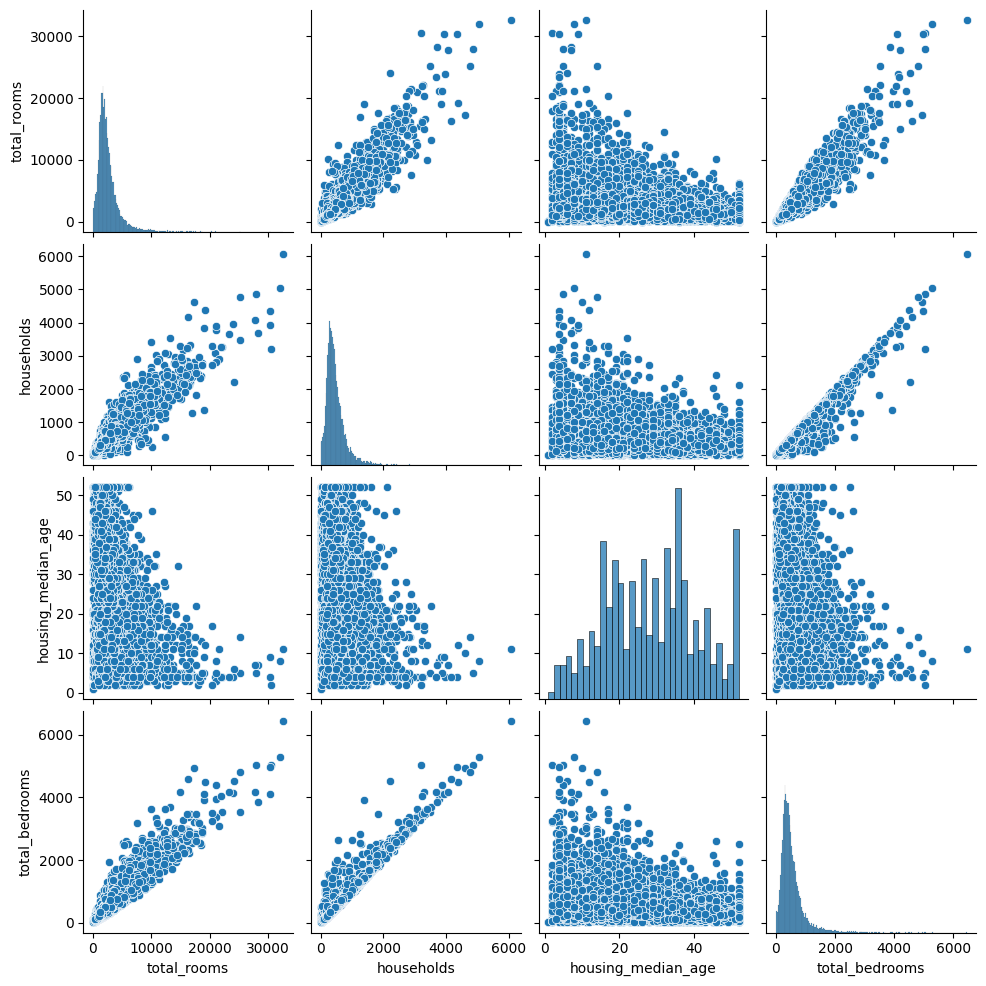

In [372]:
# Create Pairplot to see correlation of total_bedrooms
cols_bed = df_model[['total_rooms','households','housing_median_age','total_bedrooms']]
sns.pairplot(cols_bed)
plt.show()

Upon observing the above pairplot, it's evident that **"total_bedrooms" doesn't correlate with "housing_median_age", but it does have a relationship with "total_rooms" and "households"**. This observation makes sense, given that "total_bedrooms" would naturally be associated with the total number of rooms in a district and the number of people living in a household.

Given this insight, we'll address the missing values in "total_bedrooms" based on its relationship with "total_rooms" and "households" by utilizing the **IterativeImputer** method. 

Instead of filling in the missing values based solely on mean, median, or mode, IterativeImputer is a method used to fill in missing values by modeling each missing feature based on the other features and the process is iterative until the values settle. Therefore, it creates a more accurate imputation. 

In this case, **we will try to fill in the missing values in "total_bedrooms" based on other features which are "total_rooms" and "household" using IterativeImputer**

In [373]:
# Import Library 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Fill missing values with IterativeImputer
cols_imp = df_model[['total_bedrooms', 'total_rooms', 'households']]

imputer = IterativeImputer(max_iter=10) # Set the max iterations to 10
imp_bed = imputer.fit_transform(cols_imp)

# Assigned the imputation to "total_bedrooms"
df_model['total_bedrooms'] = imp_bed[:, 0].round().astype(float)

In [374]:
# Check missing values after imputation
df_model.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Dataset is free of missing values**

## **Outliers**

After cleaning missing values in the dataset, we will check for outliers in the dataset using a boxplot

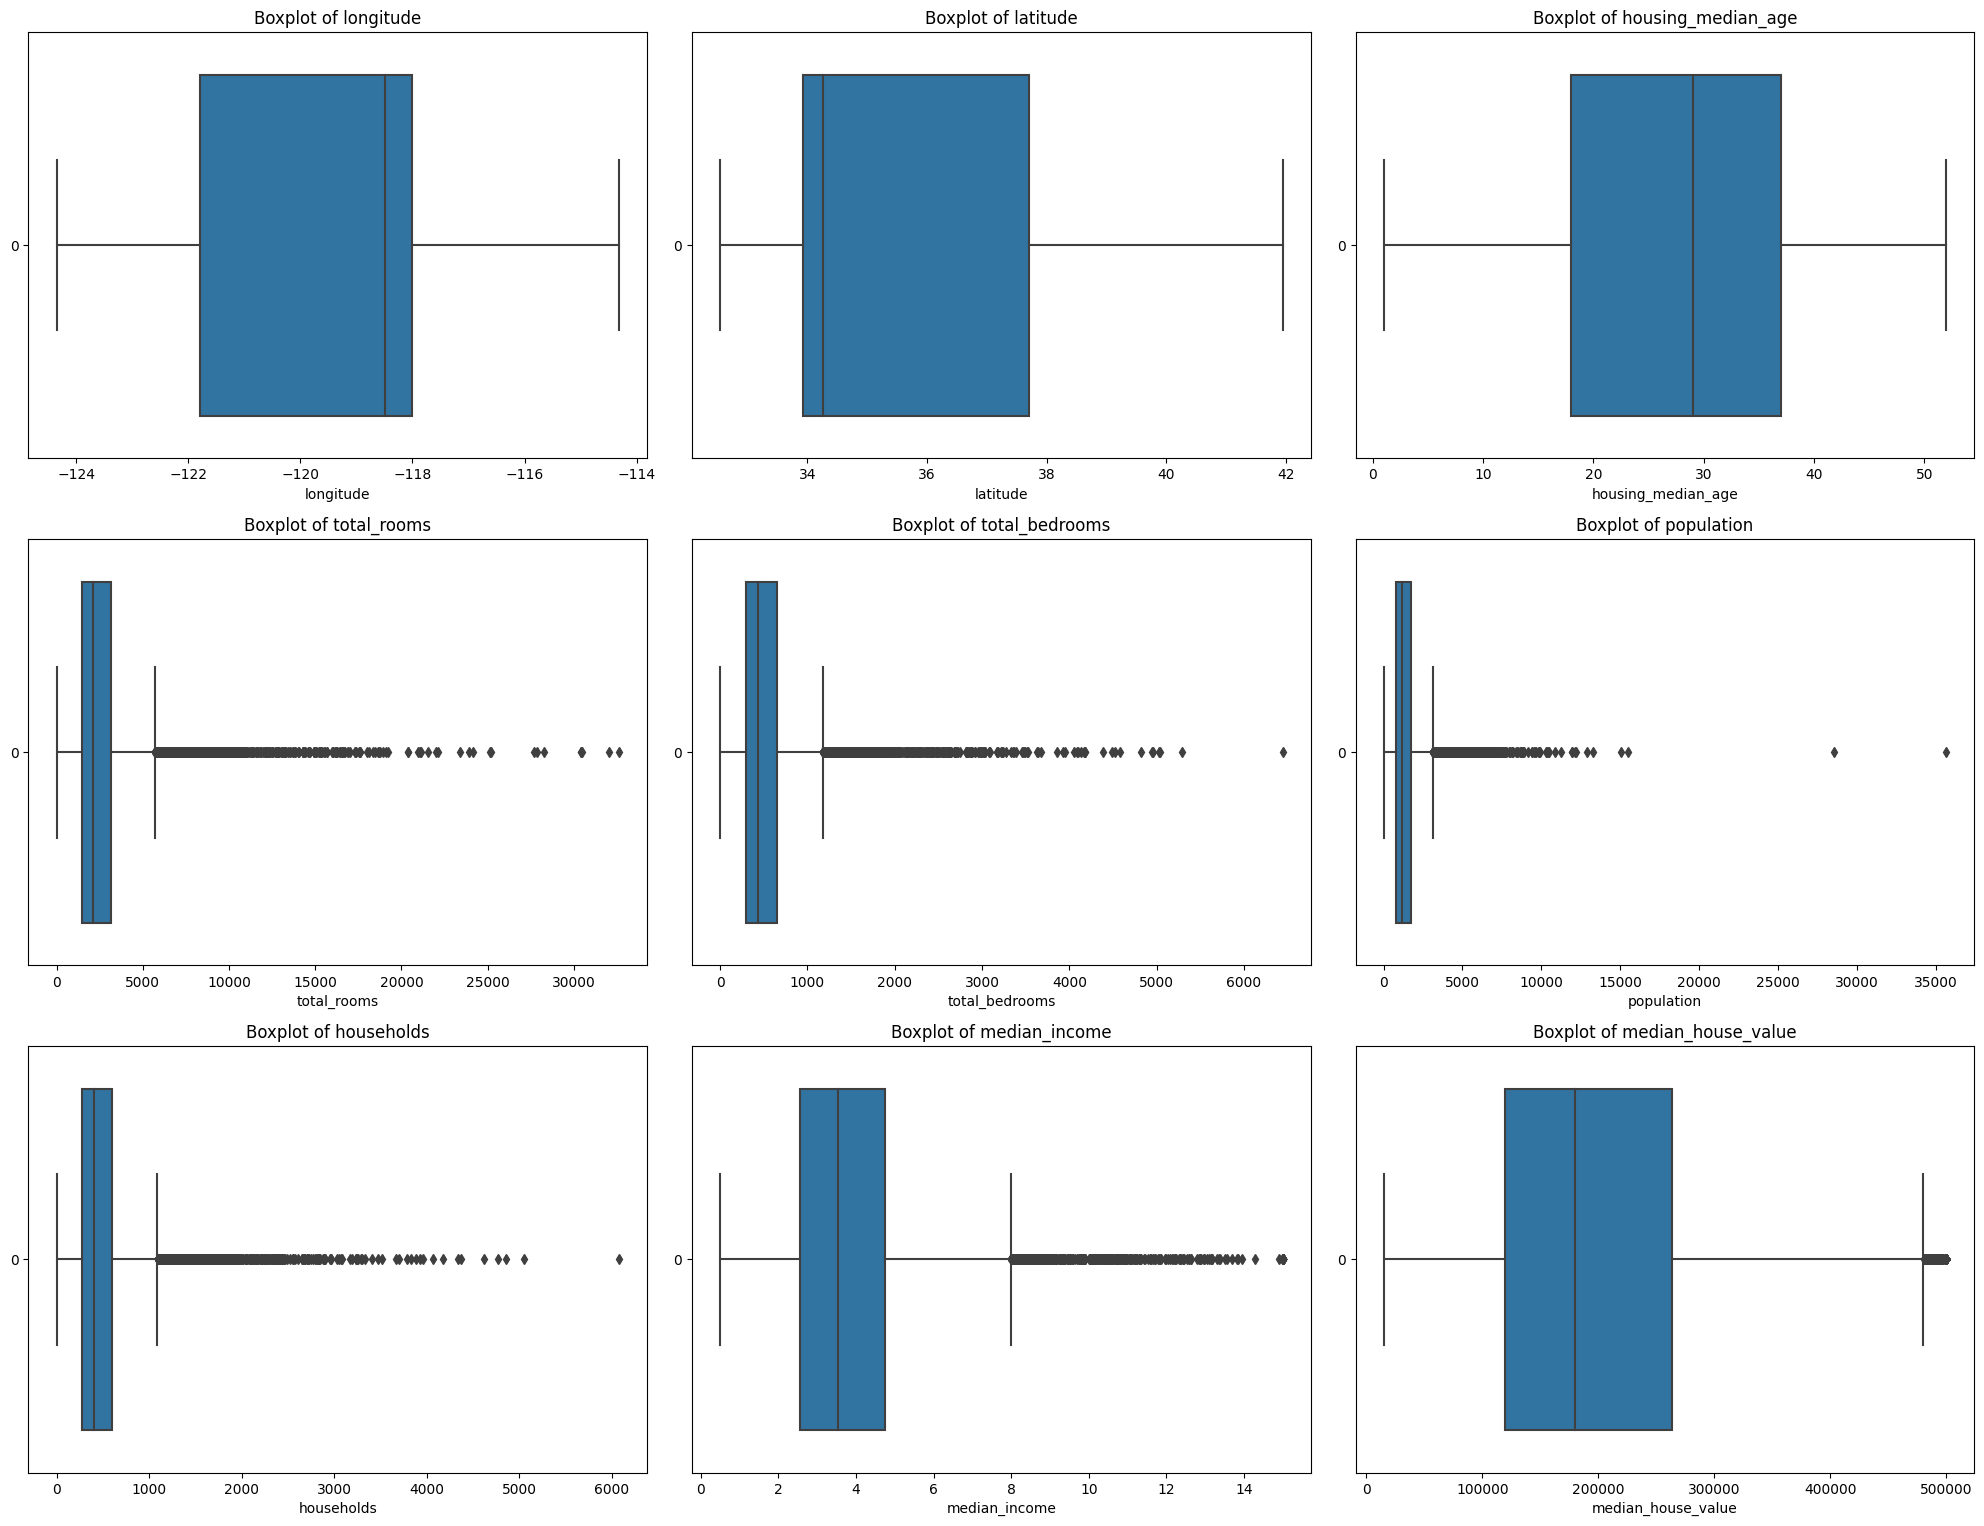

In [375]:
# Create Boxplot for Numerical Columns
numerical_columns = df_model[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']]
plt.figure(figsize=(20,20))
for i,column in enumerate(numerical_columns,1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_model[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [376]:
# Create function for calculating outliers
def calculate_outliers(df_model, column):
    Q1 = df_model[column].quantile(0.25)
    Q3 = df_model[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1,Q3,IQR

# Create function fot identifying lower and upper bound
def bound(column):
    Q1,Q3,IQR = calculate_outliers(df_model,column)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[column] < lower_bound) | (df_model[column] > upper_bound)]
    return outliers, lower_bound,upper_bound

# Print output calculation of outliers
for column in numerical_columns:
    outlier_df, lower, upper = bound(column)
    print(f'Total outliers in column "{column}" = {len(outlier_df)}')
    print(f'Percentage of outliers in column "{column}" = {(round(len(outlier_df) / (len(df_model[column]))*100,2))}%')
    print(f'Lower bound for column "{column}" = {lower}')
    print(f'Upper bound for column "{column}" = {upper}\n')

Total outliers in column "longitude" = 0
Percentage of outliers in column "longitude" = 0.0%
Lower bound for column "longitude" = -127.5
Upper bound for column "longitude" = -112.30000000000001

Total outliers in column "latitude" = 0
Percentage of outliers in column "latitude" = 0.0%
Lower bound for column "latitude" = 28.259999999999998
Upper bound for column "latitude" = 43.38

Total outliers in column "housing_median_age" = 0
Percentage of outliers in column "housing_median_age" = 0.0%
Lower bound for column "housing_median_age" = -10.5
Upper bound for column "housing_median_age" = 65.5

Total outliers in column "total_rooms" = 900
Percentage of outliers in column "total_rooms" = 6.23%
Lower bound for column "total_rooms" = -1094.5
Upper bound for column "total_rooms" = 5693.5

Total outliers in column "total_bedrooms" = 884
Percentage of outliers in column "total_bedrooms" = 6.12%
Lower bound for column "total_bedrooms" = -234.5
Upper bound for column "total_bedrooms" = 1177.5

To

After checking for outliers in the numerical columns using boxplots, we found that the columns **"total_rooms", "total_bedrooms", "population", "households", "median_income", and "median_house_value" have a significant number of outliers.** If we remove these outliers directly, it would result in a substantial loss of data and potentially damaging the quality of the model we inted to build. Therefore, these outliers need to be treated appropriately. 

#### **Treat Outliers total_rooms**

First, construct boxplot of "total_rooms" before treating the outliers. 

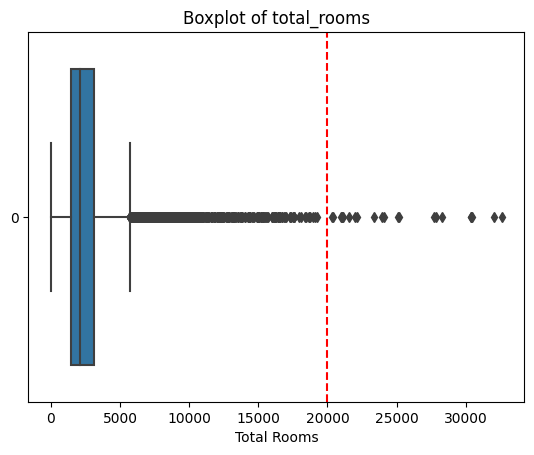

In [377]:
# Boxplot before treatment
plt.title(f'Boxplot of total_rooms')
plt.xlabel('Total Rooms')
sns.boxplot(data=df['total_rooms'], orient='horizontal')
plt.axvline(x=20000,color='r',linestyle='--')

In [378]:
# Statistics Descriptive total_rooms
df_model['total_rooms'].describe()

count    14448.000000
mean      2640.132683
std       2191.612441
min          2.000000
25%       1451.000000
50%       2125.000000
75%       3148.000000
max      32627.000000
Name: total_rooms, dtype: float64

From the boxplot above, we can see that there's a gap in the outliers. There are a lot of values between 5693.5 (upper bound) to (approximately) 20000, thus if we directly drop all the outliers above the upper bound, we will loose so many datas. Therefore, we will create **a boundary** where the value above 20000 will be dropped. 

In [379]:
# Check total_rooms above 20000
df[(df['total_rooms'] > 20000)].count()['total_rooms']

22

In [380]:
# Check values above 20000
df_model[df_model['total_rooms'] > 20000].sort_values(by='total_rooms')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12741,-121.73,37.68,17.0,20354.0,3493.0,8768.0,3293.0,5.4496,INLAND,238900.0
12470,-117.16,33.57,2.0,20391.0,3245.0,7132.0,2716.0,3.9443,<1H OCEAN,187300.0
5649,-121.40,38.47,4.0,20982.0,3392.0,10329.0,3086.0,4.3658,INLAND,130600.0
8787,-117.19,33.90,3.0,21060.0,3366.0,9623.0,2812.0,4.1890,INLAND,143000.0
8177,-118.55,34.41,8.0,21086.0,3945.0,9936.0,3790.0,5.8602,<1H OCEAN,265100.0
13131,-118.43,34.43,5.0,21113.0,4386.0,9842.0,3886.0,4.2037,<1H OCEAN,194600.0
6431,-117.83,33.97,11.0,21533.0,3078.0,9671.0,2890.0,7.0329,<1H OCEAN,368300.0
12723,-117.12,33.49,4.0,21988.0,4055.0,8824.0,3252.0,3.9963,<1H OCEAN,191100.0
3911,-117.75,34.01,4.0,22128.0,3522.0,10450.0,3258.0,6.1287,<1H OCEAN,289600.0
13945,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,INLAND,144000.0


There are 22 values above 20000 in "total_rooms", so if we dropped these values it will not affect our model significantly.

In [381]:
# Drop outliers above 20000
df_model = df_model[(df_model['total_rooms'] <= 20000)]
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: title={'center': 'Boxplot of total_rooms'}, xlabel='Total Rooms'>

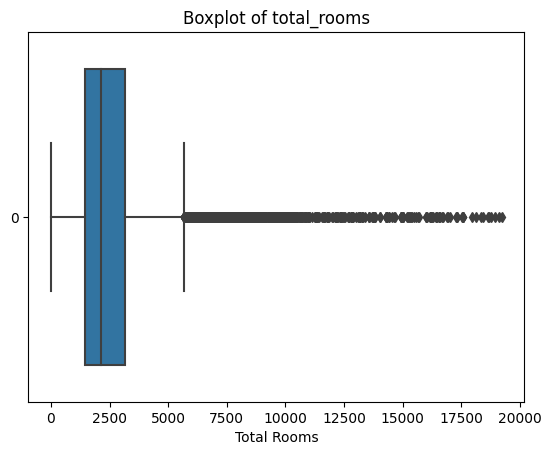

In [382]:
# Boxplot after treatment 
plt.title(f'Boxplot of total_rooms')
plt.xlabel('Total Rooms')
sns.boxplot(data=df_model['total_rooms'], orient='horizontal')

After dropping the outliers above 20000, we  can see that there's still enough data to be used in our model 

#### **Treat Outliers total_bedrooms**

First, construct boxplot of "total_bedrooms" before treating the outliers

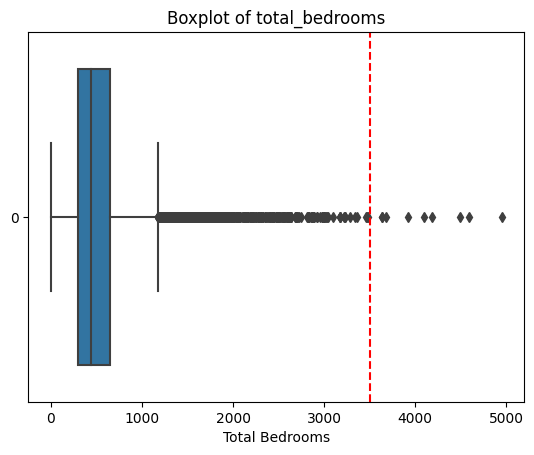

In [383]:
# Boxplot before treatment
plt.title(f'Boxplot of total_bedrooms')
plt.xlabel('Total Bedrooms')
sns.boxplot(data=df_model['total_bedrooms'], orient='horizontal')
plt.axvline(x=3500,color='r',linestyle='--')

In [384]:
# Statistics Descriptive total_bedrooms
df_model['total_bedrooms'].describe()

count    14426.000000
mean       532.659573
std        396.737193
min          1.000000
25%        294.000000
50%        435.000000
75%        647.000000
max       4952.000000
Name: total_bedrooms, dtype: float64

From the boxplot above, there's a gap in the outliers in which there are lot of values between 1177.5 (upper bound) to (approximately) 3500, thus if we directly drop all the outliers above the upper bound, we will loose so many datas. Therefore, we will create **a boundary** where the value above 3500 will be dropped. 

In [385]:
# Check total_bedrooms above 3500
df_model[df_model['total_bedrooms'] > 3500].sort_values(by='total_bedrooms')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6296,-121.41,38.59,17.0,12355.0,3630.0,5692.0,3073.0,2.5245,INLAND,99100.0
14326,-118.34,33.91,12.0,9975.0,3638.0,7429.0,3405.0,2.6689,<1H OCEAN,192300.0
5199,-118.35,33.84,22.0,13133.0,3680.0,7180.0,3522.0,3.5414,<1H OCEAN,354700.0
7088,-116.33,33.75,5.0,19107.0,3923.0,2880.0,1376.0,4.0360,INLAND,158500.0
10138,-117.61,34.10,9.0,18956.0,4095.0,10323.0,3832.0,3.6033,INLAND,132600.0
5585,-118.60,34.19,16.0,14912.0,4183.0,5105.0,3302.0,2.8312,<1H OCEAN,213900.0
14295,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,<1H OCEAN,152800.0
14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0
9809,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,INLAND,103400.0


In [386]:
# Check total_rooms above 3500
df_model[(df_model['total_bedrooms'] > 3500)].count()['total_bedrooms']

9

There are 9 values above 3500 in "total_bedrooms", so if we dropped these values it won't affect our model significantly. 

In [387]:
# Drop outliers above 3500
df_model = df_model[df_model['total_bedrooms'] <= 3500]
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: title={'center': 'Boxplot of total_bedrooms'}, xlabel='Total Bedrooms'>

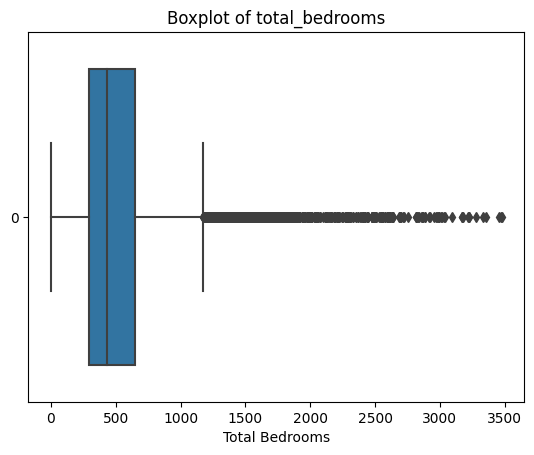

In [388]:
# Boxplot after treatment
plt.title(f'Boxplot of total_bedrooms')
plt.xlabel('Total Bedrooms')
sns.boxplot(data=df_model['total_bedrooms'], orient='horizontal')

After dropping the outliers above 3500, we can see that there's still enough data to be used in our model

#### **Treat Outliers population**


First, construct boxplot of "population" before treating the outliers

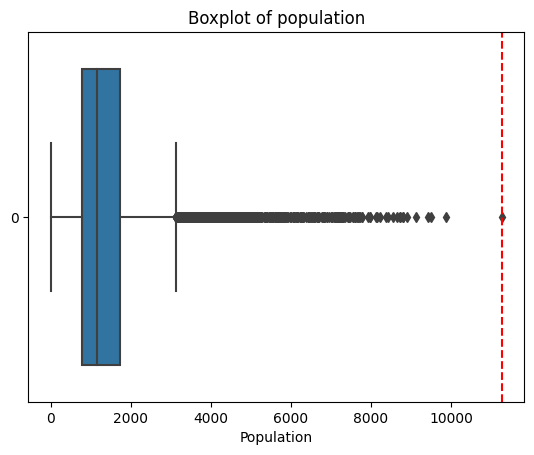

In [389]:
# Boxplot before treatment
plt.title(f'Boxplot of population')
plt.xlabel('Population')
sns.boxplot(data=df_model['population'], orient='horizontal')
plt.axvline(x=11272,color='r',linestyle='--')

In [390]:
# Statistics Descriptive population
df_model['population'].describe()

count    14417.000000
mean      1404.307831
std       1018.484221
min          3.000000
25%        784.000000
50%       1163.000000
75%       1719.000000
max      11272.000000
Name: population, dtype: float64

From the boxplot above, we can see that there's a gap in the outliers, which is the maximum value 11272. Therefore, we will drop this value. 

In [391]:
# Check population = 11272
df_model[(df_model['population'] >= 11272 )].count()['population']

1

Since the outliers we want to drop is the maximum value, therefore there's only 1 value

In [392]:
# Drop outliers = 11272
df_model = df_model[df_model['population'] < 11272]
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: title={'center': 'Boxplot of population'}, xlabel='Population'>

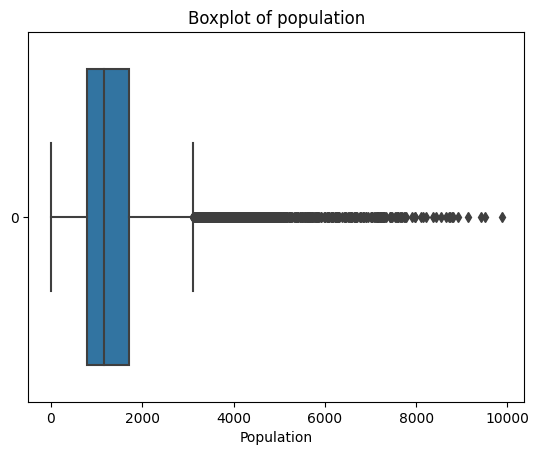

In [393]:
# Boxplot after treatmenet 
plt.title(f'Boxplot of population')
plt.xlabel('Population')
sns.boxplot(data=df_model['population'], orient='horizontal')

After dropping the maximum value, we  can see that there's still enough data to be used in our model 

#### **Treat Outliers households**

First, construct boxplot of "households" before treating outliers 

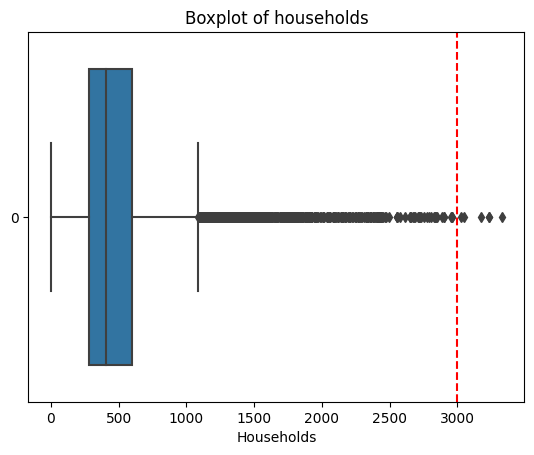

In [394]:
# Boxplot before treatment 
plt.title(f'Boxplot of households')
plt.xlabel('Households')
sns.boxplot(data=df_model['households'], orient='horizontal')
plt.axvline(x=3000,color='r',linestyle='--')

In [395]:
# Statistics Descriptive households 
df_model['households'].describe()

count    14416.000000
mean       492.535794
std        351.245095
min          1.000000
25%        278.000000
50%        409.000000
75%        602.000000
max       3329.000000
Name: households, dtype: float64

From the boxplot above, there's a gap in the outliers in which there are lot of values between 1091.5 (upper bound) to (approximately) 3000, thus if we directly drop all the outliers above the upper bound, we will loose so many datas. Therefore, we will create **a boundary** where the value above 3000 will be dropped. 

In [396]:
# Check households above 3000
df_model[df_model['households'] > 3000].sort_values(by='total_bedrooms')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4593,-122.06,37.40,21.0,12855.0,3226.0,7273.0,3052.0,4.3351,NEAR BAY,267400.0
5582,-117.01,32.83,17.0,15401.0,3280.0,7302.0,3176.0,3.3067,<1H OCEAN,121900.0
6957,-118.33,33.91,8.0,10731.0,3335.0,7211.0,3028.0,2.4550,<1H OCEAN,192700.0
1738,-121.35,38.54,12.0,16239.0,3358.0,8656.0,3234.0,3.5691,INLAND,116300.0
5290,-121.50,38.62,8.0,16679.0,3457.0,7919.0,3329.0,3.7188,INLAND,134500.0
8996,-116.99,33.73,13.0,16148.0,3474.0,6159.0,3232.0,1.9961,INLAND,97800.0


In [397]:
# Check value households above 3000
df_model[(df_model['households'] > 3000 )].count()['households']

6

There are 6 values above 3000 in "households", so if we dropped these values it won't affect our model significantly. 

In [398]:
# Drop outliers above 3000
df_model = df_model[df_model['households'] <= 3000]
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: title={'center': 'Boxplot of households'}, xlabel='Households'>

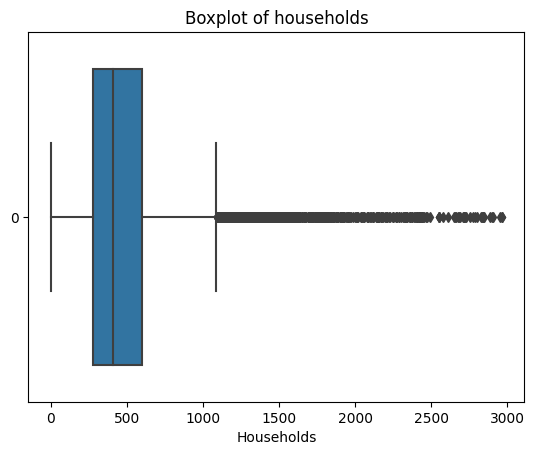

In [399]:
# Boxplot after treatment
plt.title(f'Boxplot of households')
plt.xlabel('Households')
sns.boxplot(data=df_model['households'], orient='horizontal')

After dropping the outliers above 3000, we can see that there's still enough data to be used in our model

#### **Treat Outliers median_income**

First, construct boxplot of "median_income" before treating outliers 

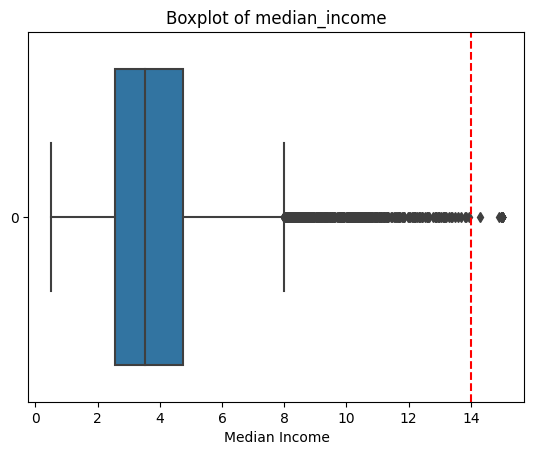

In [400]:
# Boxplot before treatment
plt.title(f'Boxplot of median_income')
plt.xlabel('Median Income')
sns.boxplot(data=df_model['median_income'], orient='horizontal')
plt.axvline(x=14,color='r',linestyle='--')

In [401]:
# Statistics Descriptive median_income
df_model['median_income'].describe()

count    14410.000000
mean         3.865660
std          1.891674
min          0.499900
25%          2.569550
50%          3.536000
75%          4.736000
max         15.000100
Name: median_income, dtype: float64

From the boxplot above, we can see that there's a gap in the outliers. There are a lot of values between 7.98 (upper bound) to (approximately) 14, thus if we directly drop all the outliers above the upper bound, we will loose so many datas. Therefore, we will create **a boundary** where the value above 14 will be dropped. 

In [402]:
# Check median_income above 14 
df_model[df_model['median_income'] >= 14].sort_values(by='median_income')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4599,-118.46,34.07,49.0,2418.0,301.0,850.0,318.0,14.2867,<1H OCEAN,500001.0
13163,-117.68,33.59,8.0,2327.0,263.0,899.0,236.0,14.9009,<1H OCEAN,500001.0
2385,-118.50,34.05,39.0,1487.0,163.0,414.0,160.0,15.0000,<1H OCEAN,500001.0
9853,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,<1H OCEAN,500001.0
241,-122.44,37.79,52.0,1447.0,186.0,483.0,181.0,15.0001,NEAR BAY,500001.0
7259,-122.18,37.46,40.0,2529.0,293.0,831.0,258.0,15.0001,NEAR BAY,500001.0
8580,-118.18,34.19,48.0,1371.0,188.0,528.0,155.0,15.0001,<1H OCEAN,500001.0
9144,-118.06,33.72,14.0,2665.0,331.0,964.0,319.0,15.0001,NEAR OCEAN,500001.0
9191,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,NEAR BAY,500001.0
9193,-118.41,34.07,52.0,3562.0,394.0,1163.0,361.0,15.0001,<1H OCEAN,500001.0


In [403]:
# Check value median_income above 14 
df_model[df_model['median_income'] > 14].count()['median_income']

35

There are 35 values above 14 in "median_income", so if we dropped these values it won't affect our model significantly.

In [404]:
# Drop outliers above 14
df_model = df_model[df_model['median_income'] <= 14]
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: title={'center': 'Boxplot of median_income'}, xlabel='Median Income'>

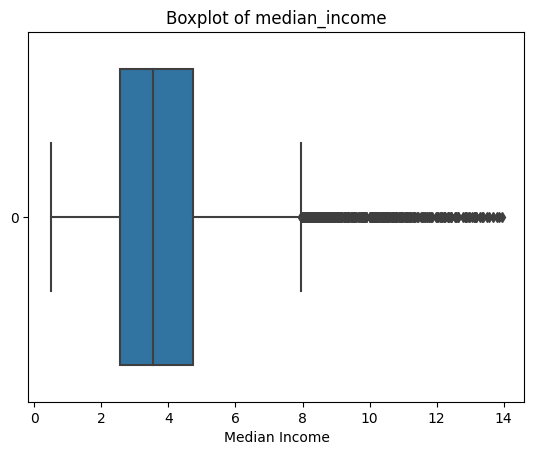

In [405]:
# Boxplot after treatment
plt.title(f'Boxplot of median_income')
plt.xlabel('Median Income')
sns.boxplot(data=df_model['median_income'], orient='horizontal')

After dropping the outliers above 14, we can that there's still enough data to be used in our model 

#### **Treat Outliers median_house_value**

First construct boxplot of "median_house_value"

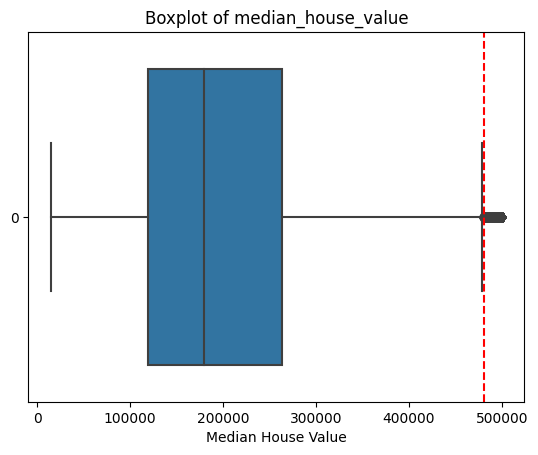

In [406]:
# Boxplot before treatment
plt.title(f'Boxplot of median_house_value')
plt.xlabel('Median House Value')
sns.boxplot(data=df_model['median_house_value'], orient='horizontal')
plt.axvline(x=480350,color='r',linestyle='--')

In [407]:
# Check value median_house_value above upper bound 
df_model[df_model['median_house_value'] > 480350.0].count()['median_house_value']

724

There are 724 values above the upper bound which is around 5.24%. Since it is still relatively small, we decided to drop all the outliers in the median_house_value to create a more robust model. 

In [442]:
# Drop outliers above upper bound
df_model = df_model[df_model['median_house_value']<=480350.0]

In [446]:
df_model[df_model['median_house_value'] > 480350.0].count()['median_house_value']

0

After dropping the outliers, we can see that there is no outliers anymore

## **Duplicate Values**

### **Duplicate Values in Overall Data**

In [410]:
# Check duplicate values
df_model[df_model.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


Overall, the data doesn't have any duplicate values. Now, to ensure there is no duplicate values at all, let's check for duplicate values based on the area or district by examining duplicates in the "longitude" and "latitude" columns.

### **Duplicate Values based on Columns "longitude" and "latitude"**

In [411]:
# Check duplicate values based on longitude and latitude
df_model[df_model[['longitude','latitude']].duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
432,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,238300.0
434,-118.13,33.79,20.0,6678.0,1797.0,3625.0,1599.0,3.7716,NEAR OCEAN,242900.0
486,-121.26,37.97,31.0,1189.0,295.0,891.0,292.0,2.5536,INLAND,50500.0
503,-117.13,32.75,20.0,2271.0,602.0,992.0,520.0,2.2599,NEAR OCEAN,157600.0
571,-118.97,35.38,35.0,1673.0,426.0,1041.0,413.0,1.3750,INLAND,57500.0
...,...,...,...,...,...,...,...,...,...,...
14434,-122.22,37.47,35.0,367.0,113.0,398.0,109.0,2.5000,NEAR OCEAN,166700.0
14437,-118.07,34.12,43.0,1554.0,287.0,802.0,277.0,4.2312,INLAND,272600.0
14438,-122.43,37.75,52.0,2285.0,509.0,839.0,456.0,4.7946,NEAR BAY,355600.0
14439,-117.24,33.20,25.0,1631.0,415.0,1045.0,386.0,2.4505,<1H OCEAN,147500.0


In [412]:
# Check one of the duplicate values
df_model[(df_model['longitude']==-117.87) & (df_model['latitude']==33.60)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


When examined based on the "longitude" and "latitude" columns, duplicate values are found, where the same longitude and latitude values exist in the dataset. However, this is not an issue because in the same district, there may be different characteristics of houses. As in the example above, one area has a different "housing_median_age," and each "housing_median_age" has different values for "total_rooms," "total_bedrooms," and "households." Furthermore, the varying population figures also represent the total population within a block, where the initial assumption was that each district has different numbers of blocks.

### **Duplicate Values based on Columns "median_house_value"**

Now, let's check the duplicate values in "median_house_value" 

In [413]:
# Check duplicate values based on "median_house_value"
df_model[df_model['median_house_value'].duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
25,-120.38,36.76,12.0,932.0,244.0,1043.0,243.0,1.4038,INLAND,54300.0
35,-118.24,34.11,50.0,2141.0,451.0,1777.0,426.0,2.7679,<1H OCEAN,178800.0
66,-118.43,34.22,34.0,1588.0,360.0,1080.0,340.0,3.6600,<1H OCEAN,184600.0
139,-122.24,38.25,33.0,213.0,36.0,91.0,33.0,4.9167,NEAR BAY,187500.0
154,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,INLAND,275000.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,397.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0


In [414]:
# Check one of the duplicate values
df_model[df_model['median_house_value']==54300.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15,-115.99,33.40,15.0,1945.0,536.0,515.0,273.0,2.0109,INLAND,54300.0
25,-120.38,36.76,12.0,932.0,244.0,1043.0,243.0,1.4038,INLAND,54300.0
2122,-117.81,35.65,19.0,1124.0,290.0,598.0,261.0,1.8984,INLAND,54300.0
5394,-119.03,35.41,41.0,1808.0,435.0,1005.0,373.0,1.7857,INLAND,54300.0
14091,-123.68,40.24,31.0,1852.0,452.0,917.0,359.0,1.7250,<1H OCEAN,54300.0


When we check the duplicate values in "median_house_value", there is indeed  duplicate values in one single value of "median_house_value." Nevertheless, this is not an issue because a single value may be in different districts with different house characteristics.

## **Findings in Data Cleaning**
1. Data types are already correct.
2. Based on domain knowledge, it is decided to use all features in modeling, meaning no columns are dropped.
3. There are missing values in the "total_bedrooms" column, and the missing values in "total_bedrooms" are filled based on other features, namely "total_rooms" and "household," using IterativeImputer.
4. There are 6 columns with outliers, and they are addressed by removing outliers based on predefined boundaries.
5. Overall, there are no duplicate values in the dataset.

# Modeling
---

In [415]:
# Import Library for Modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## **Pipeline Feature Engineering**

### **Scaling**

In [416]:
# Statistics Descriptive
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13651.000000,13651.000000,13651.000000,13651.000000,13651.000000,13651.000000,13651.000000,13651.000000,13651.000000
mean,-119.559366,35.652679,28.382243,2571.862208,530.725954,1417.017947,492.889459,3.653906,190580.067175
std,2.008054,2.155927,12.467304,1943.221474,382.032975,1014.320749,347.050821,1.536963,95165.223024
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,296.000000,793.000000,280.000000,2.524400,116200.000000
50%,-118.500000,34.270000,28.000000,2105.000000,437.000000,1179.000000,411.000000,3.442700,173300.000000
75%,-117.990000,37.730000,37.000000,3112.500000,647.000000,1738.500000,603.000000,4.557800,246000.000000
max,-114.310000,41.950000,52.000000,18767.000000,3479.000000,9879.000000,2964.000000,13.110700,480100.000000


The first step is to scaling the numerical variables in order to have the same unit of measurement. There are 3 methods to scale our data, but we will use the **Robust Scaler** since our data still contain outliers. This particular scaling method is a good choice when dealing with data that has outliers because it uses median and IQR to scale input values

### **Encoding**

In [417]:
# Check Data Types for Categorical Variable
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13651 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13651 non-null  float64
 1   latitude            13651 non-null  float64
 2   housing_median_age  13651 non-null  float64
 3   total_rooms         13651 non-null  float64
 4   total_bedrooms      13651 non-null  float64
 5   population          13651 non-null  float64
 6   households          13651 non-null  float64
 7   median_income       13651 non-null  float64
 8   ocean_proximity     13651 non-null  object 
 9   median_house_value  13651 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [418]:
# Check how many categories in ocean_proximity
df_model['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5935
INLAND        4545
NEAR OCEAN    1707
NEAR BAY      1462
ISLAND           2
Name: count, dtype: int64

Next, we will encode our categorical variable, which is "ocean_proximity." This variable has 5 categories that represent the location of houses based on their distance to the ocean. Therefore, we will use the **Binary Encoder** since we have a sufficient number of categories in "ocean_proximity".

### **Preprocessing Scheme**

After determining what steps need to be taken so that numerical and categorical features can be used in modeling. At this stage, we will Scaling and Encoding using ColumnTransformer so that it can later be implemented into the Pipeline.

**Preprocessing Scheme**
1. Numerical Columns &rarr; Robust Scaling
2. Categorical Column &rarr; Binary Encoding

In [419]:
# Create Preprocessing Scheme
transformer = ColumnTransformer([
    ('Scaler',RobustScaler(),['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']),
    ('Binary',ce.BinaryEncoder(),['ocean_proximity'])
],remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('Binary', BinaryEncoder(),
                                 ['ocean_proximity'])])

## **Data Splitting**

Next, we will choose the features and target variables. As mentioned before, we will use all the features available. After that, since we want to predict the house value, we will use "median_house_value" as the target variable. 

In [420]:
# Choose features and target variables
x = df_model.drop(['median_house_value'],axis=1)
y = df_model['median_house_value']

## **Train Test Split**


For the train test split, we will split with 80:20 proportion 

In [421]:
# Splitting train and test data with 80:20 proportion

xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2023
)

## **Benchmark Model**


### **Choose Benchmark Models (Stand-alone & Ensemble Models)**

For predicting house values, we will use several models both stand-alone and ensemble models:
1. **Linear Regression**: used for modeling the relationship between a dependant variable and one or more independent variables. It is simple and less complex to implement thus thisi model is a good starting point for predicting median house values. It helps establish a baseline understanding of the relationship between independent variables and the target.
2. **K-Nearest Neighbors Regressor (KNN)**: used to predict the target variable by averaging the values of its k-nearest neighbors in the training data. It is effective for capturing localized patterns in the data, which can be valuable in areas where nearby houses have similar values due to geographic or demographic factors.
3. **DecisionTree Regressor**: split the data into subsets based on the features, the structure is a like tree where each leaf node predicts the target variable by averaging the values of data points in that node. This model is useful to identify specific features that drive house values because it is easy to interpret.
4. **Support Vector Regressor**: have the same concept with SVM and it is used to find a hyperplane that best fits the data while minimizing the margin of error. It is effective for capturing complex relationships between features and median house values. 
5. **Random Forest Regressor**: an ensemble learning method that combines multiple decision trees to make predictions. It can reduce overfitting and increasing model accuracy so we will use this model to make a robust decision. 
6. **XGBoost Regressor**: creates an ensemble of decision tree that uses gradient boosting framework and optimizes the model's performance. It builds an ensemble of decision trees, each one correcting the errors of the previous tree parallely thus is known for its speed and accuracy. 

For the evaluation metrics, we will use RMSE, MAE, and MAPE:
1. **RMSE (Root Mean Square Error)**: RMSE helps us know how close our predictions are to the actual values, though it is senstive to outliers. Smaller RMSE means more accurate predictions.
2. **Mean Absolute Error**: MAE measures the average absolute difference between predicted and actual values. It is less sensitive to outliers than RMSE, making it a robust metric.  Lower MAE is better.
3. **Mean Absolute Percentage Error**: MAPE shows us the error as a percentage of the actual value. Lower MAPE means our predictions are closer in percentage terms.

By using these 3 metrics, we get a good picture of how well out model predicts the house values in California. 

Now it's time to code

In [422]:
# Define stand-alone models
reg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2023)
svr = SVR()

# Define Ensemble Models
rf = RandomForestRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023)

In [423]:
# Statistics Descriptive median_house_value
df_model['median_house_value'].describe()

count     13651.000000
mean     190580.067175
std       95165.223024
min       14999.000000
25%      116200.000000
50%      173300.000000
75%      246000.000000
max      480100.000000
Name: median_house_value, dtype: float64

Due to the large range of values in the target variable, which means there are significant differences in the units, with a minimum value of 14,999 and a maximum value of 480,100, resulting in values in the tens of thousands and hundreds of thousands in the target variable.

To address this, we will model the machine learning using logarithms, and then we will reverse it using the exponential function to avoid misinterpretation. After that, we will compare which model is better, whether using the logarithmic scale or not.

In [424]:
# Transform target variable to natural logarithm and inverse with exponential
log_reg = TransformedTargetRegressor(reg,func=np.log,inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn,func=np.log,inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree,func=np.log,inverse_func=np.exp)
log_svr = TransformedTargetRegressor(svr,func=np.log,inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf,func=np.log,inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb,func=np.log,inverse_func=np.exp)

# Define models in a list  
model = [reg, knn, tree, svr, rf, xgb, log_reg, log_knn, log_tree, log_svr, log_rf, log_xgb]

# Evaluation metrics
score_rmse = []
score_mean_rmse = []
score_std_rmse = []

score_mae = []
score_mean_mae = []
score_std_mae = []

score_mape = []
score_mean_mape = []
score_std_mape = []

# Modeling
for i in model:
    # Identify cross validator
    cv_iterator = KFold(n_splits=5, shuffle=True, random_state=2023)

    # Create Pipeline
    model_pipe = Pipeline([
        ('preprocess',transformer),
        ('clf',i)
    ])

    # RMSE
    cv_rmse = cross_val_score(model_pipe,xtrain,ytrain,cv=cv_iterator,scoring='neg_root_mean_squared_error') # Use neg value for a proper order of the error term 
    score_rmse.append(cv_rmse)
    score_mean_rmse.append(cv_rmse.mean())
    score_std_rmse.append(cv_rmse.std())

    # MAE
    cv_mae = cross_val_score(model_pipe,xtrain,ytrain,cv=cv_iterator,scoring='neg_mean_absolute_error') # Use neg value for a proper order of the error term 
    score_mae.append(cv_mae)
    score_mean_mae.append(cv_mae.mean())
    score_std_mae.append(cv_mae.std())

    # MAPE
    cv_mape = cross_val_score(model_pipe,xtrain,ytrain,cv=cv_iterator,scoring='neg_mean_absolute_percentage_error') # Use neg value for a proper order of the error term 
    score_mape.append(cv_mape)
    score_mean_mape.append(cv_mape.mean())
    score_std_mape.append(cv_mape.std())

In [425]:
# Create Dataframe for Model Evaluation
pd.DataFrame({
    'Model' : ['Linear Regression','KNN Regressor','DecisionTree Regressor','SVR','RandomForest Regressor','XGBoost Regressor',
               'Log Linear Regression','Log KNN Regressor','Log DecisionTree Regressor','Log SVR','Log RandomForest Regressor','Log XGBoost Regressor'],
    'Mean_RMSE' : score_mean_rmse,
    'Std_RMSE' : score_std_rmse,
    'Mean_MAE' : score_mean_mae,
    'Std_MAE' : score_std_mae,
    'Mean_MAPE' : score_mean_mape,
    'Std_MAPE' : score_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-59222.468292,1137.276235,-43897.328130,681.500698,-0.271009,0.005934
1,KNN Regressor,-56174.571087,709.585310,-39632.961832,541.596173,-0.231630,0.004469
2,DecisionTree Regressor,-64632.977864,2435.153239,-43919.451282,1549.539422,-0.255901,0.014527
3,SVR,-96858.540630,752.533745,-75356.970108,562.938623,-0.500760,0.009866
4,RandomForest Regressor,-46172.685692,1249.093695,-31455.732063,631.492988,-0.187748,0.005896
5,XGBoost Regressor,-44631.155148,1565.527560,-30335.487920,706.151579,-0.179230,0.004006
6,Log Linear Regression,-62233.062983,2523.635806,-43068.698123,641.966866,-0.244901,0.003169
7,Log KNN Regressor,-56284.422385,720.583554,-38978.671033,521.437430,-0.219111,0.003508
8,Log DecisionTree Regressor,-63203.204715,1687.871193,-42697.885256,1441.435882,-0.244282,0.005324
9,Log SVR,-51411.652972,1232.395704,-35235.982616,648.379987,-0.200066,0.004901


From the results above, we can see that **RandomForest Regressor and XGBoost Regressor**, both without logarithms and with logarithms, have the lowest RMSE, MAE, and MAPE score. 

From MAPE's perspective, RandomForest Regressor have 18.7% of error without logarithms and 17.1% error with logarithms. Followed by XGBoost Regressor have 17.9% error without logarithms and 16.7% error with logarithms. Therefore, we will try to predict the test set using these 2 benchmark models, either with or without logarithms. 

### **Predict Test Set with Benchmark Model**

We have already decided the 2 benchmark models which are **RandomForest Regressor and XGBoost Regressor (with and without logarithms)**. 

Now, we will predict to the test set using those 2 benchmark models 

In [426]:
# Predict test set with 2 benchmark models

model = {
    'RandomForest Regressor' : RandomForestRegressor(random_state=2023),
    'XGBoost Regressor' : XGBRegressor(random_state=2023),
    'Log RandomForest Regressor' : log_rf,
    'Log XGBoost Regressor' : log_xgb
}

score_rmse = []
score_mae = []
score_mape = []

for i in model:
    model_pipe = Pipeline([
        ('preprocess',transformer),
        ('clf',model[i])
    ])
        
    model_pipe.fit(xtrain, ytrain)
    ypred = model_pipe.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, ypred)))
    score_mae.append(mean_absolute_error(ytest, ypred))
    score_mape.append(mean_absolute_percentage_error(ytest, ypred))

predict_score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=model.keys())
predict_score_before_tuning

,RMSE,MAE,MAPE
RandomForest Regressor,43383.714702,29988.768228,0.181665
XGBoost Regressor,41474.747205,28325.833951,0.173158
Log RandomForest Regressor,43172.164110,28914.299429,0.166897
Log XGBoost Regressor,41941.979396,28004.416177,0.162165


These evaluation metrics provide insights into the performance of different models when predicting house values on the test dataset. As mentioned before, lower RMSE, MAE, and MAPE values indicate more accurate prediciton.

**The XGBoost Regressor tends to perform better than the RandomForest Regresso**r, showing lower RMSE, MAE, and MAPE values, signifying more accurate and closer predictions to the actual values. Additionally, utilizing transformed target variables in the models (Log versions) appears to enhance their performance, resulting in even reduced errors and percentage errors. Therefore, **Log XGBoost Regressor** is the best model. 

However, in order to be 100% sure that Log XGBoost Regressor is our best model, we will implement hyperparameter tuning first. 

### **Hyperparameter Tuning**

#### **Tuning to Train Set**

Since the RandomForest Regressor and XGBoost Regressor models have shown the best performance, we've decided to conduct Hyperparameter Tuning for both of these models. The goal of Hyperparameter Tuning is to improve the model's performance. 

We'll use two methods: **Grid Search**, which explores all possible combinations of candidate models for the **RandomForest Regressor**, and **Randomized Search**, which randomly selects combinations of candidate models for the **XGBoost Regressor**. Using Randomized Search for XGBoost Regressor helps to speed up the process. 

#### 1| Random Forest Regressor with GridSearch CV

For RandomForest Regressor, we will use several hyperparameter:
1. **n_estimators**: Specifies the number of decision trees. We'll test different values from 50, 100, and 150 to find the best number of trees
2. **max_features**: Maximum number of features each tree can consider when splitting a node. We'll use "auto" which means all features and "sqrt" which means the square root of the number of features
3. **max_depth**: Controls the maximum depth of each decision tree in the random forest. We'll use "None" (unlimited depth), 10, and 20. 
4. **min_samples_split**: Sets the minimum number of samples required to split an internal node. We'll use 2 and 5 to represent different numbers to control node splitting.
5. **min_samples_leaf**: Defines the minimum number of samples required to be in a leaf node. We'll test using lower value like 1 and 2 to determine the minimum sample in leaf node. 

Larger values for most of these hyperparameters tend to increase the model's complexity and capacity to fit the training data, though it can lead to overfitting and longer training times. 

*source: [Documentation RandomForest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)*

In [427]:
# Define parameters
def_param_grid_rf = {
    'model__n_estimators': [50,100,150], # Larger n_estimators, more complex the model becomes
    'model__max_features': ['auto', 'sqrt'], # "auto" = all features; "sqrt" = square root features
    'model__max_depth': [None, 10, 20], # Deeper depth, make the model more accurate 
    'model__min_samples_split': [2, 5], # Larger value make the model less overfitting
    'model__min_samples_leaf': [1, 2] # Larger value of samples in each leaf node means smoother model 
}


# Model for Hyperparameter Tuning
rf = RandomForestRegressor(random_state=2023)

# Create Pipeline
pipe_rf= Pipeline([
    ('preprocess',transformer),
    ('model',rf)
])

# Identify cross validator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=2023)

# Hyperparameter Tuning
grid_rf = GridSearchCV(pipe_rf, 
                       param_grid=def_param_grid_rf, 
                       cv=cv_iterator, 
                       scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
                       n_jobs=-1, 
                       refit='neg_mean_absolute_percentage_error')

In [428]:
# Fit to train set
grid_rf.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['ocean_proximity'...
                                        RandomForestRegressor(random_state=2023))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [50, 100, 150]},
             refit='neg_mean_absolute_percentage_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

Next, we print the best scores and best parameters from the hyperparameter tuning 

In [429]:
# Print best scores
print('RandomForest Regressor')
print(f'Best Score:', grid_rf.best_score_)
print(f'Best Params:', grid_rf.best_params_)

RandomForest Regressor
Best Score: -0.18528531619593272
Best Params: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}


#### 2| XGB Regressor with RandomizedSearch CV

For XGBoost Regressor, we will use several hyperparameter:

1. **max_depth**: controls how deep the trees in the model can go. A smaller value makes simpler trees, and a larger value makes more complex trees.
2. **learning_rate**: controls the step size at each iteration while moving toward a minimum of the loss function. Smaller values  make the optimization more robust but require more iterations, larger values may be faster but are more sensitive to the choice of other hyperparameters
3. **n_estimators**: the number of trees in the model. More trees generally mean a better model, but it takes more time.
4. **subsample**: how much of the training data the model looks at in each step. It helps make the model more reliable.
5. **gamma**: a parameter for regularization. It penalizes the complexity of the trees, reducing overfitting
6. **colsample_bytree**: how many features the model uses to build each tree. More features mean more complexity.
7. **reg_alpha**: parameter for L1 regularization (penalty)

Randomized Search helps find the best settings for these things to make the XGBoost model work well. It tries different combinations to see what's best for your data.

*source: [Documentation XGBoost Regressor](https://xgboost.readthedocs.io/en/stable/parameter.html)*

In [430]:
# Define Parameters
def_param_grid_xgb = {
    'model__max_depth': [3, 5, 7, 9],  # A smaller value makes simpler trees, and larger value makes more complex trees.
    'model__learning_rate': [0.01, 0.05, 0.1, 0.3],  #  Choices for learning rate
    'model__n_estimators': [50, 100, 150],  # Choices for number of trees
    'model__subsample': [0.5, 0.7, 0.9],  # Common choices for subsample
    'model__gamma': [0, 1, 5],  #  Represent low, medium, and high regularization strengths
    'model__colsample_bytree': [0.5, 0.7, 0.9],  # More features mean more complexity
    'model__reg_alpha': [0.001, 0.01, 0.1, 1]  # Range for L1 regularization
}

xgb = XGBRegressor(random_state=2023)

pipe_xgb= Pipeline([
    ('preprocess',transformer),
    ('model',xgb)
])

# Identify cross validator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=2023)

# Hyperparameter Tuning
random_xgb = RandomizedSearchCV(pipe_xgb, 
                       param_distributions=def_param_grid_xgb, 
                       cv=cv_iterator, 
                       n_iter=50,
                       scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
                       n_jobs=-1, 
                       refit='neg_mean_absolute_percentage_error',
                       random_state=2023)

In [431]:
# Fit to train set
random_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_prox...
                                        'model__gamma': [0, 1, 5],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.3],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__n_estimators': [50, 100, 150],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1],
                                        'model__subsample': [0.5, 0.7, 0.9]},
                   random_state=2023,
                   refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

Next, we print the best scores and best parameters from the hyperparameter tuning 

In [432]:
# Print best scores
print('XGBoost Regressor')
print(f'Best Score:', random_xgb.best_score_)
print(f'Best Params:', random_xgb.best_params_)

XGBoost Regressor
Best Score: -0.17259863528397537
Best Params: {'model__subsample': 0.9, 'model__reg_alpha': 1, 'model__n_estimators': 150, 'model__max_depth': 9, 'model__learning_rate': 0.1, 'model__gamma': 5, 'model__colsample_bytree': 0.9}


#### **Predict to Test Set with Tuned Model**

Next, make predictions on the test set using the RandomForest Regressor and XGBoost Regressor model (with and without logarithms) with the best hyperparameter settings.

#### 1| Random Forest Regressor 

From the tuning above using Grid Search with RandomForest Regressor as the model, we find that the best hyperparameters are:
1. model__max_depth: None
2. model__max_features: auto
3. model__min_samples_leaf: 2 
4. model__min_samples_split: 2
5. model__n_estimators: 150

So, we will tune to the test set using the best hyperparameters defined above

> ##### **Without Logarithms**

In [433]:
# Best Model
model = {'RandomForest Regressor' : RandomForestRegressor(random_state=2023)}

# Fit to model
rf_tuning = grid_rf.best_estimator_
rf_tuning.fit(xtrain,ytrain)

# Predict to test set 
ypred_tuning_rf = rf_tuning.predict(xtest)

# Evaluation metrics RMSE, MAE, MAPE after tuning
rmse_tuning = np.sqrt(mean_squared_error(ytest,ypred_tuning_rf))
mae_tuning = mean_absolute_error(ytest,ypred_tuning_rf)
mape_tuning = mean_absolute_percentage_error(ytest,ypred_tuning_rf)

# Create dataframe
predict_score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=model.keys())
predict_score_after_tuning_rf

,RMSE,MAE,MAPE
RandomForest Regressor,43195.681294,29753.54648,0.180075


From MAPE's perspective with RandomForest Regressor model, the error is around 18%. This implies that the tuning model is **slightly better** than the one before tuning, given the error is 18.1%. 

Now we'll try to tune using Log RandomForest Regressor 

> ##### **With Logarithms**

In [434]:
# Best Model
rf = RandomForestRegressor(max_depth= None, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 150,random_state=2023)
log_rf = TransformedTargetRegressor(rf,func=np.log,inverse_func=np.exp)

est_log_rf = Pipeline([
    ('preprocess',transformer),
    ('model',log_rf)
])

# Fit to model
est_log_rf.fit(xtrain,ytrain)

# Predict to test set 
ypred_tuning_log_rf = est_log_rf.predict(xtest)


# Evaluation metrics RMSE, MAE, MAPE after tuning
rmse_tuning = np.sqrt(mean_squared_error(ytest,ypred_tuning_log_rf))
mae_tuning = mean_absolute_error(ytest,ypred_tuning_log_rf)
mape_tuning = mean_absolute_percentage_error(ytest,ypred_tuning_log_rf)

# Create dataframe
# Create dataframe with an index
predict_score_after_tuning_log_rf = pd.DataFrame(data={'Model': 'Log RandomForest Regressor', 'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=[0])
predict_score_after_tuning_log_rf

,Model,RMSE,MAE,MAPE
0,Log RandomForest Regressor,43017.450604,28810.896815,0.166216


From MAPE's perspective with Log RandomForest Regressor model, the error is around 16.6%. This implies that the tuning model is **no better** than the one before tuning, given the error have the same value which is 16.16%. 

#### 2| XGB Regressor with RandomizedSearch CV

From the tuning above using Randomized Search with XGBoost Regressor as the model, we find that the best hyperparameters are:

1. model__subsample: 0.9 
2. model__reg_alpha: 1 
3. model__n_estimators: 150 
4. model__max_depth: 9 
5. model__learning_rate: 0.1 
6. model__gamma: 5 
7. model__colsample_bytree: 0.9

So, we will tune to the test set using the best hyperparameters defined above

> ##### **Without Logarithms**

In [435]:
# Best Model
model = {'XGBoost Regressor' : XGBRegressor(random_state=2023)}

# Fit to model
xgb_tuning = random_xgb.best_estimator_
xgb_tuning.fit(xtrain,ytrain)

# Predict to test set 
ypred_tuning_xgb = xgb_tuning.predict(xtest)

# Evaluation metrics RMSE, MAE, MAPE after tuning
rmse_tuning = np.sqrt(mean_squared_error(ytest,ypred_tuning_xgb))
mae_tuning = mean_absolute_error(ytest,ypred_tuning_xgb)
mape_tuning = mean_absolute_percentage_error(ytest,ypred_tuning_xgb)

# Create dataframe
predict_score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=model.keys())
predict_score_after_tuning_xgb

,RMSE,MAE,MAPE
XGBoost Regressor,40585.545627,27586.056942,0.1657


From MAPE's perspective with XGBoost Regressor model, the error is around 16.5%. This implies that the tuning model is **better** than the one before tuning, given the error is 17.3%. 

Now we'll try to tune using Log XGBoost Regressor 

> ##### **With Logarithms**

In [436]:
# Best Model
xgb = XGBRegressor(subsample= 0.9, reg_alpha= 1, n_estimators= 150, max_depth= 9, learning_rate= 0.1, gamma= 5, colsample_bytree= 0.9, random_state=2023)
log_xgb = TransformedTargetRegressor(xgb,func=np.log,inverse_func=np.exp)

est_log_xgb = Pipeline([
    ('preprocess',transformer),
    ('model',log_xgb)
])
# Fit to model
est_log_xgb.fit(xtrain,ytrain)

# Predict to test set 
ypred_tuning_log_xgb = est_log_xgb.predict(xtest)

# Evaluation metrics RMSE, MAE, MAPE after tuning
rmse_tuning = np.sqrt(mean_squared_error(ytest,ypred_tuning_log_xgb))
mae_tuning = mean_absolute_error(ytest,ypred_tuning_log_xgb)
mape_tuning = mean_absolute_percentage_error(ytest,ypred_tuning_log_xgb)

# Create dataframe
predict_score_after_tuning_log_xgb = pd.DataFrame(data={'Model' : 'Log XGBoost Regressor', 'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=[0])
predict_score_after_tuning_log_xgb

,Model,RMSE,MAE,MAPE
0,Log XGBoost Regressor,53636.062225,37636.465311,0.213772


Looking at the MAPE metric with the Log XGBoost Regressor model, the error rate increases to approximately 21.3% after tuning. This indicates that the tuned model performs **less effectively** than the one before tuning, which had an error rate of 16.2%.

### **Performance Comparison Before Tuning vs After Tuning**

Now, it's time to compare which model performs better after modeling with hyperparameter tuning and without it. It's important to remember that a tuned model may not necessarily be the best-performing one, so we need to reevaluate the models we've worked on.

#### **Score Before Tuning**

In [437]:
# Score before hyperparameter tuning
pd.DataFrame(predict_score_before_tuning.loc[['RandomForest Regressor','XGBoost Regressor','Log RandomForest Regressor','Log XGBoost Regressor']])

,RMSE,MAE,MAPE
RandomForest Regressor,43383.714702,29988.768228,0.181665
XGBoost Regressor,41474.747205,28325.833951,0.173158
Log RandomForest Regressor,43172.164110,28914.299429,0.166897
Log XGBoost Regressor,41941.979396,28004.416177,0.162165


#### **Score After Tuning**

In [438]:
# Merged all the scores after tuning 
merged_scores_after_tuning = pd.concat([predict_score_after_tuning_rf, predict_score_after_tuning_xgb, predict_score_after_tuning_log_rf, predict_score_after_tuning_log_xgb])
merged_scores_after_tuning.reset_index(drop=True, inplace=True)

# Reorder the columns in the merged dataframe
columns_order = ['Model', 'RMSE', 'MAE', 'MAPE']
merged_scores_after_tuning = merged_scores_after_tuning[columns_order]

# Fill NaN values in the "Model" column with specific values
merged_scores_after_tuning['Model'].fillna("RandomForest Regressor", limit=1, inplace=True)
merged_scores_after_tuning['Model'].fillna("XGBoost Regressor", limit=1, inplace=True)

merged_scores_after_tuning


,Model,RMSE,MAE,MAPE
0,RandomForest Regressor,43195.681294,29753.546480,0.180075
1,XGBoost Regressor,40585.545627,27586.056942,0.165700
2,Log RandomForest Regressor,43017.450604,28810.896815,0.166216
3,Log XGBoost Regressor,53636.062225,37636.465311,0.213772


#### **Best Model**

**Before Tuning:**
- RandomForest Regressor had an RMSE of 43,383.71, MAE of 29,988.77, and MAPE of 18.17%.
- XGBoost Regressor had an RMSE of 41,474.75, MAE of 28,325.83, and MAPE of 17.32%.
- Log RandomForest Regressor had an RMSE of 43,172.16, MAE of 28,914.30, and MAPE of 16.69%.
- Log XGBoost Regressor had an RMSE of 41,941.98, MAE of 28,004.42, and MAPE of 16.22%.

**After Tuning:**
- RandomForest Regressor had an RMSE of 43,195.68, MAE of 29,753.55, and MAPE of 18.01%.
- Log RandomForest Regressor had an RMSE of 43,017.45, MAE of 28,810.90, and MAPE of 16.62%.
- XGBoost Regressor had an RMSE of 40,585.55, MAE of 27,586.06, and MAPE of 16.57%.
- Log XGBoost Regressor had an RMSE of 53,636.06, MAE of 37,636.47, and MAPE of 21.38%.

From the comparisons, we can see that the **XGBoost Regressor after tuning** has the lowest overall error scores (RMSE, MAE, MAPE). This indicates that it's the best-performing model to predict house values in California, providing the most accurate predictions.

**Why Log XGBoost Regressor is not the best model?**

The goal of logging the target variable (using the logarithmic function) is to transform the data and make it more suitable for modeling. In some cases, this transformation can improve the performance of a model. However, **it's not guaranteed to be the best choice for every dataset or problem**. 

The reason why it's not guaranteed because as we see after tuning, the "Log XGBoost Regressor" have a significant increase in errors of RMSE, MAE, and MAPE indicating that the log transformation may not have been beneficial for this specific dataset and problem. Therefore, **the best model in this case, "XGBoost Regressor" after tuning, demonstrated superior performance in terms of RMSE, MAE, and MAPE with 16.5% of error**.

**Plot Actual vs Predicted Value using XGBoost Regressor After Tuning**

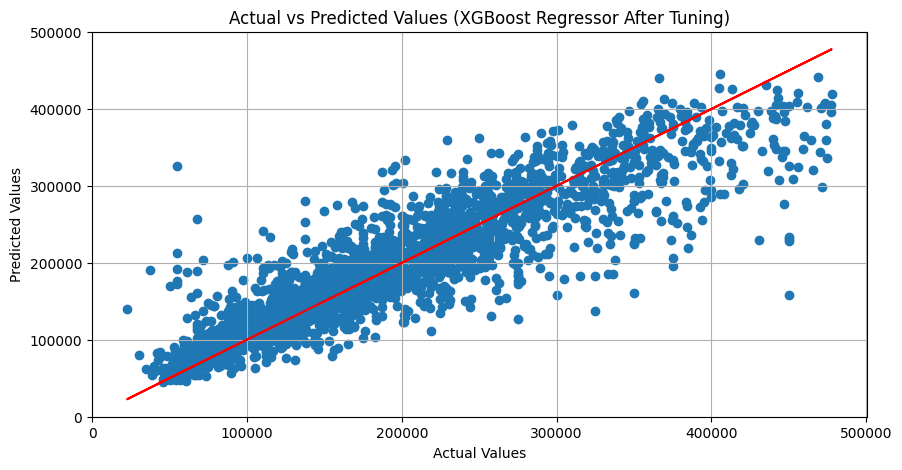

In [439]:
# Create a DataFrame to store actual and predicted values
actual_vs_predict_xgb = pd.DataFrame({'Actual': ytest, 'Predicted': ypred_tuning_xgb})

# Plot the actual vs predict 
plt.figure(figsize=(10, 5))
plt.scatter(actual_vs_predict_xgb['Actual'], actual_vs_predict_xgb['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (XGBoost Regressor After Tuning)')
plt.plot(actual_vs_predict_xgb['Actual'], actual_vs_predict_xgb['Actual'], color='red')  # red line 
plt.grid(True)
plt.show()

In [440]:
# Score R2 for the best model 
score_r2 = r2_score(ytest,ypred_tuning_xgb)
score_r2

0.812513308439888

Based on the MAPE value, the XGBoost Regressor model after tuning achieved an error of 16.5%. This error is relatively small when we consider the plot above, where there is a moderate difference between actual house values and predicted house values. The data points are relatively close to the red line, indicating that they closely align with the actual values. In addition, The R-squared (R2) score is 0.8125 and suggests that our model explains around 81.25% of the variations in house values,  providing a reasonably good fit to the data. However, it's important to note that **there is still some deviation in this prediction model**, indicating **the possibility of both overpricing and underpricing**. 

*Overprice* refers to a prediction error where the predicted house value is higher than the actual house value by 16.5%. Conversely, *underprice* means a prediction error where the predicted house value is lower than the actual house value by 16.5%.

## **Feature Importance**

To find out what features really influence the target variable (median_house_value), we will check below the features importance.

Next, we construct the plot to visualize the feature importances

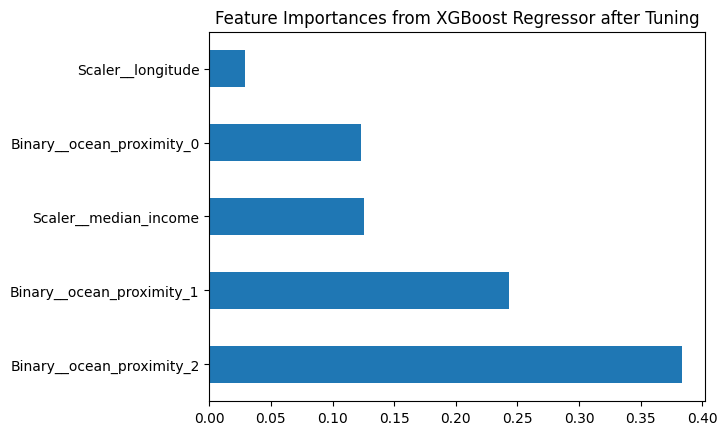

In [441]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances from XGBoost Regressor after Tuning');

Out of the 9 features utilized in our model, 8 were scaled using RobustScaler, and 1 was encoded using BinaryEncoder. Interestingly, the analysis reveals that **"ocean_proximity" and "median_income"** are the most influential features in predicting house values. This implies that both location and median income levels play substantial roles in determining housing prices.

# Conclusion, Impact to Business, and Recommendations
---

## **Conclusion**

In our modeling process, we employed five models: Linear Regression, DecisionTree Regressor, KNN Regressor, SVR, RandomForest Regressor, and XGBoost Regressor. Additionally, we applied logarithmic transformation to the target variable to normalize its range. Hyperparameter tuning was performed to optimize the models.

We assessed model performance using RMSE, MAE, and MAPE metrics. Based on the MAPE value, we identified **the XGBoost Regressor after tuning as the best-performing model**, with an error of 16.5%. This indicates that our model can be used to predict new median house values in California, with an expected deviation of approximately 16.5% from the true value, potentially indicating overpricing or underpricing.

Furthermore, our analysis revealed that **"ocean_proximity" and "median_income" are the most influential features** in predicting house prices in California. This is reasonable because proximity to the ocean tends to increase house prices, and median income plays a crucial role in determining house prices, as those with higher incomes typically afford more expensive homes.

While our model shows promise, there is room for improvement to enhance prediction accuracy, given some limitations that constrain its predictive capabilities.


## **Impact to Business: Cost Effective**

##### **Before using Machine Learning Model**

Before implementing machine learning model to predict median house, a Broker, only relied on **traditional methods and market knowledge** to estimate property values and helping her clients in real estate transactions. 

A broker have to performed manual valuations based on factors like location, property size on their own thus it tend to subject to human error and potential biases. This manual valuations need a **long process so it's time consuming**. Based on this [website](https://hingemarketing.com/blog/story/cost_and_benefits_of_market_research), the average duration of a market research project ranges from about 2 to 8 weeks. Imagine, to predict one house value, we need 2 to 8 weeks of research. Not only it's time consuming, it's also cost a lot of money. 

Let's assume the broker is evaluating a house using traditional method with a 4 week research period. During this period, the housing market experiences a price change. Asumming **the housing market changes by an average of 1% per week**.

**Calculate the potential cost for traditional methods**
- Market research takes 4 weeks to predict a house value and assume it cost $100 per day to conduct a research 
    - **28 days x $100 = $2,800**
&rarr; **Total cost for one valuation $2,800**

**It needs $2,800 a month to conduct one valuation. In total, real estate agent need $33,600 a year to predict one house value**

##### **After using Machine Learning Model**

Meanwhile, adopting a machine learning model to predict house values, a Broker only need **less than a day** to predict a house value. This is because the predictions is **data-driven** where the model can incorporated a wide range of features, such as location, income levels, and house attributes. Not to mention, we can predict multiple house values at once by using this model.

**Calculate the potential cost for machine learning model**
- Time required for one property valuation: Almost instant (once the model is trained)
- Cost for model development and maintenance: Let's assume an initial cost of $10,000 to develop the model and an annual maintenance cost of $2,000.

[KPMG](https://assets.kpmg.com/content/dam/kpmg/uk/pdf/2019/07/investment-in-technology-innovation.pdf) find that a common timeframe for technology investments is a 5-year period. So, we will calculate total cost for the machine learning model over a 5-year period 

**$10,000 (initial) + $2,000/year * 5 years = $10,000 + $10,000 = $20,000**

**Conclusion**

Implementing a machine learning model for predicting house values only requires a total investment of $20,000 over 5 years. In contrast, using traditional methods costs approximately $33,600 per year ($168,000 for 5 years). This cost comparison reveals a significant financial impact on real estate agents when transitioning to a machine learning model.

When considering the potential for mispricing, traditional methods involve a lengthy 4-week process to estimate a property's value. This extended duration leaves room for market conditions to change, with the housing market typically fluctuating by an average of 1% per week. These factors not only result in substantial time and monetary costs but also lead to a greater risk of mispricing, as many variables can change during the 4-week period. Additionally, traditional methods are susceptible to human errors and biases, which can further influence valuation accuracy.

On the other hand, a machine learning model relies on data-driven algorithms that are less prone to human biases. It offers near-instant valuations, reducing the risk of providing outdated information. Even with a 16.5% error rate, which may lead to occasional underpricing or overpricing, the overall cost remains lower compared to traditional methods.

In conclusion, the mispricing risk associated with manual valuation is significant due to the time delay, potential errors, and biases. In contrast, implementing a machine learning model, while necessitating an initial investment, can substantially mitigate these risks and provide more accurate and timely property valuations.

## **Recommendations**

### **Recommendations for Model**

1. **Incorporate District Names**: Instead of using latitude and longitude to represent districts in California, consider using the actual district names in the data. This would provide more meaningful and relevant information for the model, potentially leading to more accurate predictions.
2. **Outlier Handling**: While it's important to maintain a robust model, consider revisiting the handling of outliers. Instead of dropping outliers based solely on assumptions or domain knowledge, you can explore more data-driven outlier detection techniques to ensure that valuable information is not discarded.
3. **Update Data**: Since the model is based on census data from 1990, it may not accurately predict house values in the present day. It's recommended to update the dataset with more recent and relevant data to improve the model's accuracy.
4. **Feature Engineering**: Explore additional feature engineering techniques to create new variables that may have a stronger impact on house value predictions. For example, you can derive features related to local amenities, transportation, or economic factors that could influence house prices.
6. **Ensemble Models**: Consider using ensemble learning techniques that combine predictions from multiple models. This can often lead to more accurate results by leveraging the strengths of different algorithms. Because this model only use similar types ensemble learning.  
7. **Continuous Improvement**: Machine learning models benefit from continuous improvement and fine-tuning. Regularly update and retrain the model as new data becomes available and as your understanding of the problem domain deepens.

By implementing these recommendations, you can enhance the model's performance and make it more valuable for predicting house values in California.

### **Recommendations for Business**

Utilizing the machine learning model into the real estate operations, it can create more accurate price predictions for houses in California. This will be a competitive advatage for the real estate agent in setting prices and negotiating with clients. However, as areal estate agent, you need to expertise in other skills such as negotiation skills so that the agent can create a good pricing for both the buyers and sellers. Not only that, while there is a model provide valuable insights, the agent need local knowledge regarding the neighborhoods and communities so that they can prove personalized services to their clients. 

# Save Model 
---

In [449]:
# Save Model
# import pickle

# xgb_tuning.fit(xtrain,ytrain)

# pickle.dump(xgb_tuning,open('Best_Model_Predict_House_Value.sav','wb'))


In [450]:
# Load Model 

# file_name = 'Best_Model_Predict_House_Value.sav'
# load_model = pickle.load(open(file_name,'rb'))
# load_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', RobustScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['ocean_proximity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=150, n_jobs=None,
                              num_parallel_tree=None, random_state=2023, ...))])